In [10]:
import numpy as np
import pickle
import json
import copy
import pandas as pd
from tqdm import tqdm
import random

from perturbations import *
from helpers import *
from pos_tag_distribution_helpers import *

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lolab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Initialising vocab from file.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lolab\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\lolab\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\lolab\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\lolab\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


# Read in data

Vocab

In [2]:
from Vocab import Vocab
vocab = Vocab('data/vocab.csv', 3)

Initialising vocab from file.


Segment data

In [4]:
from SegmentDataset import SegmentDataset

segment_test_set = SegmentDataset(
    data_dir='data/',
    segment_file='segments.json',
    vectors_file='vectors.json',
    split='test'
)

print("Testing the SegmentDataset class item getter...")
print("Dataset contains {} segment samples".format(len(segment_test_set)))
sample_id = 2
sample = segment_test_set[sample_id]
print("Segment {}:".format(sample_id))
print("Image set: {}".format(sample["image_set"]))
print("Target image index(es): {}".format(sample["targets"]))
# print("Target image Features: {}".format([segment_test_set.image_features[sample["image_set"][int(target)]] for target in sample["targets"]]))
print("Encoded segment: {}".format(sample["segment"]))
print("Decoded segment dialogue: {}".format(vocab.decode(sample["segment"])))
print("Segment length: ", sample["length"])
print("\nDone.")

Testing the SegmentDataset class item getter...
Dataset contains 6801 segment samples
Segment 2:
Image set: ['93469', '380128', '14238', '259745', '524866', '341060', '483794', '96757']
Target image index(es): [6, 2, 3]
Encoded segment: [4, 21, 11, 757, 18, 6, 26, 49, 10, 5, 41]
Decoded segment dialogue: ['-A-', 'one', 'with', 'roses', 'and', 'a', 'white', 'laptop', '?', '-B-', 'nope']
Segment length:  11

Done.


Chain data

In [5]:
from ChainDataset import ChainDataset

print("Testing the ChainDataset class initialization...")

chain_test_set = ChainDataset(
    data_dir='data/',
    segment_file='segments.json',
    chain_file='test_chains.json',
    vectors_file='vectors.json',
    split='test'
)

print("Dataset contains {} cains.".format(len(chain_test_set.chains)))

sample_id = 5
sample = chain_test_set.chains[sample_id]

print("Chain {}:".format(sample_id))
print("Source Game ID: {}".format(sample["game_id"]))
print("Target image index: {}".format(sample["target"]))
print("Chain length: {}".format(len(sample["segments"])))
print("Segment IDs: {}".format(sample["segments"]))
print("Segment lengths: ", sample["lengths"])
print("First segment encoding: {}".format(chain_test_set.segments[sample["segments"][0]]["segment"]))
print("First segment decoded dialogue: {}".format(vocab.decode(chain_test_set.segments[sample["segments"][0]]["segment"])))
print("Second segment decoded dialogue: {}".format(vocab.decode(chain_test_set.segments[sample["segments"][1]]["segment"])))
# print("third segment decoded dialogue: {}".format(vocab.decode(chain_test_set.segments[sample["segments"][2]]["segment"])))

print("Reference chain and segments' associated image sets:")
for segment in sample["segments"]:
    print(vocab.decode(chain_test_set.segments[segment]["segment"]))
    print(chain_test_set.segments[segment]["image_set"])
print("\nDone.")

print("Testing the ChainDataset class item getter...")


Testing the ChainDataset class initialization...
Dataset contains 2811 cains.
Chain 5:
Source Game ID: 3R2UR8A0IBELL07JV1VG7ISBNQAOX23WMINLGALC18GY2NUMUBSANWXRHCAO
Target image index: 522129
Chain length: 4
Segment IDs: [3, 10, 12, 15]
Segment lengths:  [23, 23, 21, 19]
First segment encoding: [5, 38, 191, 23, 127, 11, 6, 120, 23, 127, 15, 9, 314, 10, 4, 13, 5, 80, 14, 128, 68, 22, 10]
First segment decoded dialogue: ['-B-', 'two', 'plates', 'of', 'food', 'with', 'a', 'bowl', 'of', 'food', 'in', 'the', 'middle', '?', '-A-', 'no', '-B-', 'okay', '.', 'how', 'about', 'you', '?']
Second segment decoded dialogue: ['-A-', 'do', 'you', 'have', 'the', 'one', 'with', 'two', 'plates', 'and', 'the', 'salsa', 'in', 'the', 'middle', '?', '-B-', 'i', 'do', "n't", 'have', 'that', 'one']
Reference chain and segments' associated image sets:
['-B-', 'two', 'plates', 'of', 'food', 'with', 'a', 'bowl', 'of', 'food', 'in', 'the', 'middle', '?', '-A-', 'no', '-B-', 'okay', '.', 'how', 'about', 'you', '?']


Game ids

In [6]:
with open('data/test_ids.json') as json_file:
    game_ids = json.load(json_file)
game_ids

['3Z7EFSHGNACKCBAG5WMPCIYUZO6XCI39JEC7537VZS8M5L5HL7OX19JDYVCD',
 '3RWE2M8QWI8V6P1WRA6WJF5VNDKN0Z33JKGHPFYDSS9383GFTUHCC8QGLNMA',
 '3A1PQ49WVIF33I03KVFJS0R96RAH1C3018Q3ZVOJOCM0R6CJK6H5MIXUERA7',
 '3SB5N7Y3O42PWXKA46T1TVWYJIZ0G031EUONYN2W1THB2OVMUYJXVQ400OV0',
 '39PAAFCODNY9U37WR3GXD71D47STV13DY46V3X3QGQB7HRKGGM6T10BG855J',
 '3XUHV3NRVLW2R01MLIHVVQ4QGP05H13YDTZAI2WYE9R6C85OV0YBI5Z4941W',
 '3CTOC39K38OD5AAVXBZD5NY1JJ97JO3VHP9MDGROI3CPJV52G36BYNROHCFJ',
 '3KKG4CDWKJWRGBF391ATDH0O33G9493P529IW9KZJWFTD1IF929UOASN6LF6',
 '3NL0RFNU0GLBX7YUDY1I3QE4AIDK413OSWBBLG1FVUH3GU5SH0WOGCJ4LDXW',
 '31T4R4OBOTEQXW4PNJIRIJL6VO47CU3OE22WJIGJMWP8Q459CXCGO77E7UQT',
 '3JMSRU9HQJS75KPZ18R2EL1C6WIEVC39DD6S19JQ9OE4U925G5ZRE8U7OEZC',
 '3KRVW3HTZOJPPG08OBAGG6MEE4HMSO3OLQQLKKNTNYEPP5KJDJBXQI9JEJEH',
 '35GMH2SV3FFCF0G20W5OJT748FDOEY3RKNTXVS3NW5LUP817OT9CB869G4AA',
 '3A4TN5196LGNQLA10S439WA0AJHCH3304SM51WA42T6PWBXMK72QBK190BSI',
 '3KKG4CDWKJWRGBF391ATDH0O3DB94O3ERET4BTVN7CUD46UTX9KYPK0Z39KG',
 '3ZSANO2JCG5JJ68R2O63LG2

# Models

Load model

In [7]:
from get_predictions import get_predictions
from helpers import *

In [8]:
# Get the datasets for experiment split
dataset_pred_no_hist, dataset_pred_hist_cp = get_pred_datasets(split='test')

loaded model: No history
Initialising vocab from file.
vocab len 3424
Initialising vocab from file.
Loaded seg2ranks and idlist
params. normalize=True, mask=True, weight=5.5, weighting=True, batchsize=1, breaking=False
Dataparams. data_dir=./data, segmentfile=segments.json, vectorfile=vectors.json, chains_file=chains.json
segment dataset with segments.json vectors.json test
history dataset with test_segments.json vectors.json test_chains.json test
processing test

Start prediction
predict no history
{'segment': [5, 212, 4, 166, 5, 12, 22, 782, 29, 234, 213, 10, 4, 416, 14, 12, 22, 7, 6, 49, 11, 6, 155, 295, 11, 6, 811, 16, 9, 95, 10, 5, 17, 8, 12], 'image_set': ['93469', '380128', '14238', '259745', '524866', '341060', '483794', '96757'], 'targets': [5], 'length': 35, 'preds': tensor([[[0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]]], device='cuda:0'), 'loss': tensor(4.9204, device='cuda:0'), 'ranks': [0]}
getting predicito

In [ ]:

# # pickle.dump( dataset_pred_no_hist, open( "dataset_pred_no_hist.p", "wb" ) )
# # pickle.dump( dataset_pred_hist_cp, open( "dataset_pred_hist_cp.p", "wb" ) )
# dataset_pred_no_hist = pickle.load(open( "dataset_pred_no_hist.p", "rb" ) )
# dataset_pred_hist_cp = pickle.load(open( "dataset_pred_hist_cp.p", "rb" ) )

In [ ]:
# pickle.dump( dataset_pred_no_hist, open( "dataset_pred_no_hist.p", "wb" ) )
# pickle.dump( dataset_pred_hist_cp, open( "dataset_pred_hist_cp.p", "wb" ) )

In [11]:
# First index
ind = 24
print('Endocing of this segment is', dataset_pred_no_hist[ind]['segment'])
print('Decoded segment is', vocab.decode(dataset_pred_no_hist[ind]['segment']))
print('Length of the segment is', dataset_pred_no_hist[ind]['length'])
print('Images in the round of this segment is', dataset_pred_no_hist[ind]['image_set'])
print('Target of this segment is', dataset_pred_no_hist[ind]['targets'])
print('Rank (e.g. first time or third time this image was referenced in this game)', dataset_pred_no_hist[ind]['ranks'])
print('Predictions of the model on the segment is', dataset_pred_no_hist[ind]['preds'])
print('Loss of the predictions', dataset_pred_no_hist[ind]['loss'])

print(len(dataset_pred_no_hist))

Endocing of this segment is [5, 38, 59, 415, 23, 249, 18, 690, 10, 4, 17]
Decoded segment is ['-B-', 'two', 'pink', 'bowls', 'of', 'rice', 'and', 'broccoli', '?', '-A-', 'yes']
Length of the segment is 11
Images in the round of this segment is ['132002', '310714', '100022', '492731', '356290', '395097', '144797', '86285']
Target of this segment is [7, 2]
Rank (e.g. first time or third time this image was referenced in this game) [1, 1]
Predictions of the model on the segment is tensor([[[0.],
         [0.],
         [1.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]]], device='cuda:0')
Loss of the predictions tensor(12.6820, device='cuda:0')
6801


## Sort segments into conditions

The following things have been taken into account when creating the dataframes:
- Only the predictions where there was only one target image given a segment (and thus not multiple target images given a segment)
- Only the predictions where the model predicts one image (and thus not multiple images given a segment)

correct_prediction = 1 when the model predicts correctly, 0 when the model predicts wrong

In [12]:
dataframe = get_pred_dataframe(dataset_pred_no_hist, dataset_pred_hist_cp)
    

[4, 12, 22, 7, 21, 11, 294, 16, 9, 945, 10, 5, 13, 8, 12, 31] [4, 12, 22, 7, 21, 11, 294, 16, 9, 945, 10, 5, 13, 8, 12, 31]
No history


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6801/6801 [00:02<00:00, 2288.27it/s]


History


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6801/6801 [00:02<00:00, 2313.32it/s]


Sort the segments in their conditions (whether the history/no history dataset predicted them correctly)

hT_nhF - history True, no-history False (so it was correctly predicted with history, incorrectly without)

Conditions_inds is a dictionary of lists, {'condition': [segment indices for this condition]}

In [13]:
conditions_inds = get_conditions_inds(dataframe)

print("Number of segments in conditions")
counter = 0
for key in conditions_inds:
    print(key, len(conditions_inds[key]))
    counter +=len(conditions_inds[key])
counter

Number of segments in conditions
hT_nhT 1702
hT_nhF 112
hF_nhT 121
hF_nhF 248
only_h 681
only_nh 787
nothing 3150
all 6801
h_nh_all 2183


15785

In [14]:
conditions_inds['hT_nhT']

[11,
 12,
 13,
 14,
 15,
 16,
 17,
 21,
 23,
 26,
 29,
 31,
 35,
 36,
 39,
 40,
 41,
 42,
 45,
 46,
 47,
 48,
 49,
 56,
 59,
 63,
 64,
 70,
 71,
 73,
 74,
 75,
 93,
 94,
 97,
 98,
 101,
 102,
 103,
 104,
 105,
 106,
 108,
 118,
 128,
 132,
 136,
 140,
 141,
 143,
 146,
 150,
 152,
 157,
 162,
 163,
 164,
 169,
 170,
 171,
 172,
 173,
 178,
 179,
 182,
 190,
 193,
 195,
 197,
 198,
 199,
 200,
 201,
 203,
 211,
 220,
 222,
 228,
 231,
 232,
 240,
 242,
 243,
 245,
 248,
 249,
 250,
 251,
 254,
 255,
 256,
 258,
 262,
 263,
 266,
 268,
 269,
 270,
 271,
 277,
 288,
 294,
 299,
 302,
 306,
 307,
 308,
 310,
 311,
 313,
 314,
 315,
 316,
 318,
 320,
 321,
 346,
 347,
 353,
 355,
 357,
 369,
 371,
 372,
 375,
 381,
 384,
 392,
 401,
 407,
 419,
 430,
 438,
 443,
 444,
 450,
 465,
 466,
 469,
 471,
 473,
 474,
 478,
 480,
 485,
 489,
 503,
 505,
 509,
 549,
 563,
 575,
 576,
 587,
 597,
 603,
 614,
 619,
 623,
 625,
 627,
 630,
 632,
 640,
 641,
 647,
 659,
 678,
 681,
 684,
 689,
 696,
 700

In [15]:
print("The number of segments per condition that have a history:")
# For each condition
for condition in conditions_inds:
    counter = 0
#     for seg_id in range(len(dataset_pred_hist_cp)):
    # Iterate over the indices in this condition
    for seg_id in conditions_inds[condition]:
        # For each chain that this segment belongs to
        for chain_i in range(len(dataset_pred_hist_cp[seg_id]['chains'])):
            # Add counter if the segment is not the first round
            if dataset_pred_hist_cp[seg_id]['rounds'][chain_i] > 0:
                counter += 1
                break
    print(condition, counter)

The number of segments per condition that have a history:
hT_nhT 1144
hT_nhF 84
hF_nhT 61
hF_nhF 154
only_h 419
only_nh 548
nothing 2439
all 4849
h_nh_all 1443


In [16]:
results_hist_orig, results_nohist_orig, accs_hist_orig, accs_nohist_orig = get_accuracies(conditions_inds, dataframe)
print("history accuracy")
print(accs_hist_orig)
print("no history accuracy")
print(accs_nohist_orig)


C:\Users\lolab\Dropbox\CDM\project\CDM\photobook_dataset\discriminator\helpers.py:269: RuntimeWarning: invalid value encountered in double_scalars
  accs_nohist[condition] = res.sum()/len(res)
C:\Users\lolab\Dropbox\CDM\project\CDM\photobook_dataset\discriminator\helpers.py:267: RuntimeWarning: invalid value encountered in double_scalars
  accs_hist[condition] = res.sum()/len(res)


history accuracy
{'hT_nhT': 1.0, 'hT_nhF': 1.0, 'hF_nhT': 0.0, 'hF_nhF': 0.0, 'only_h': 0.7430249632892805, 'only_nh': nan, 'nothing': nan, 'all': 0.8100558659217877, 'h_nh_all': 0.8309665597801191}
no history accuracy
{'hT_nhT': 1.0, 'hT_nhF': 0.0, 'hF_nhT': 1.0, 'hF_nhF': 0.0, 'only_h': nan, 'only_nh': 0.7306226175349428, 'nothing': nan, 'all': 0.8074074074074075, 'h_nh_all': 0.8350893266147503}


## Combine segments with first in the chain for analyses
Create a dict with the first segment and current segment of a condition


In [17]:
condition_seg_hist = get_condition_seg_hist(conditions_inds, dataset_pred_hist_cp)

In [18]:
seg_id = 11
condition_seg_hist['hT_nhT'][13]

{2: {'first_id': 2,
  'first_seg': [4, 21, 11, 757, 18, 6, 26, 49, 10, 5, 41],
  'current_id': 13,
  'current_seg': [5, 549, 23, 435, 51, 29, 26, 49, 10, 4, 13, 5, 80],
  'round': 1}}

## leaving out pos tags

In [19]:
def run_pos_tag_exp(tag, perc_remove):
    

    
    percentage_remove = perc_remove / 100
    
    from ChainDataset import ChainDataset

    chain_test_set = ChainDataset(
        data_dir='data/',
        segment_file='segments.json',
        chain_file='test_chains.json',
        vectors_file='vectors.json',
        split='test'
    )
    from collections import Counter
    import nltk
    import pickle
    from nltk import word_tokenize
    from nltk.tag import pos_tag
    nltk.download('punkt')
    nltk.download('averaged_perceptron_tagger')
    nltk.download('tagsets')
    nltk.download('universal_tagset')

    from Vocab import Vocab
    vocab = Vocab('data/vocab.csv', 3)
    with open('oov_dictionary.pickle', 'rb') as f:
        oov_dict = pickle.load(f)
    
    history_dict = create_history_dict(chain_test_set.chains)

    # Remove tags from nouns
    segment_test_set_cp, chain_test_set_cp = import_dialogue_data()
    
    
    print("EERST", segment_test_set_cp[8])
    segment_test_set = remove_tag(tag, segment_test_set_cp, percentage_remove)
    print("DAARNA", segment_test_set[8])
    chain_data = update_history_dataset(segment_test_set, history_dict, chain_test_set_cp)
    
    print("IN CHAIN", chain_data[0])
    dump_json_files(chain_data, segment_test_set, tag, perc_remove)
    
    return None



TODO: add analyses here?

## Perturbations

If we make a new perturbation:
    
    * create a new segment and chain file, even if one of them is the same as the test file. Leave vocab file just as it is.
    * Make sure the file format is split+_chains.json and split+segments.json, where split is e.g. 'test_shuffle'. Split can be used to indicate the experiment that is run
    * Also let these files be put into the '/data' folder
    * When shuffeling files based on chain_test_set or segments_test set, make a deep copy first!!
    * If you change the segments in the chains json file, make sure you also update the lengths
    
    * add the experiment and the correspnding segment and chain files in the experiment_names dictionary
  

##### extra info
The training model takes these files as input. 

Change chains if we want to switch up the segments (i.e. from other games or change the order)

Change segments if we want to change things within the utterances

In [35]:
# For later analyses
experiment_names = {
#                     "standard":{'segments_file':'data/test_chains.json',
#                                 'chains_file':'data/test_segments.json',
#                                 'split':'test'},
#                    "shuffle":{'segments_file':'data/test_shuffle_chains.json',
#                                 'chains_file':'data/test_shuffle_segments.json',
#                                 'split':'test_shuffle'},
                    
#                     "pos_tag_noun":{'segments_file':'data/test_noun_segments.json',
#                                 'chains_file':'data/test_noun_chains.json',
#                                 'split':'test_noun'},
#                     "pos_tag_verb":{'segments_file':'data/test_verb_segments.json',
#                                 'chains_file':'data/test_verb_chains.json',
#                                 'split':'test_verb'},
#                     "pos_tag_adj":{'segments_file':'data/test_adj_segments.json',
#                                 'chains_file':'data/test_adj_chains.json',
#                                 'split':'test_adj'},
#                     "pos_tag_adv":{'segments_file':'data/test_adv_segments.json',
#                                 'chains_file':'data/test_adv_chains.json',
#                                 'split':'test_adv'},
                    
#                     "pos_tag_noun":{'segments_file':'data/test_NOUN_100_segments.json',
#                                 'chains_file':'data/test_NOUN_100_chains.json',
#                                 'split':'test_noun'},
#                     "pos_tag_verb":{'segments_file':'data/test_VERB_100_segments.json',
#                             'chains_file':'data/test_VERB_100_chains.json',
#                             'split':'test_verb'},
#                     "pos_tag_adj":{'segments_file':'data/test_ADJ_100_segments.json',
#                             'chains_file':'data/test_ADJ_100_chains.json',
#                             'split':'test_adj'},
#                     "pos_tag_adv":{'segments_file':'data/test_ADV_100_segments.json',
#                             'chains_file':'data/test_ADV_100_chains.json',
#                             'split':'test_adv'},
    
                    "pos_tag_noun":{'segments_file':'data/test_NOUN_50_segments.json',
                            'chains_file':'data/test_NOUN_50_chains.json',
                            'split':'test_noun'},
                    "pos_tag_verb":{'segments_file':'data/test_VERB_50_segments.json',
                            'chains_file':'data/test_VERB_50_chains.json',
                            'split':'test_verb'},
                    "pos_tag_adj":{'segments_file':'data/test_ADJ_50_segments.json',
                            'chains_file':'data/test_ADJ_50_chains.json',
                            'split':'test_adj'},
                    "pos_tag_adv":{'segments_file':'data/test_ADV_50_segments.json',
                            'chains_file':'data/test_ADV_50_chains.json',
                            'split':'test_adv'}

                    
#                    "games_0":{'segments_file':'data/test_games_0_segments.json',
#                                 'chains_file':'data/test_games_0_chains.json',
#                                 'split':'test_games_0'},
#                    "games_1":{'segments_file':'data/test_games_1_segments.json',
#                                 'chains_file':'data/test_games_1_chains.json',
#                                 'split':'test_games_1'},
#                    "games_2":{'segments_file':'data/test_games_2_segments.json',
#                                 'chains_file':'data/test_games_2_chains.json',
#                                 'split':'test_games_2'},
#                    "games_3":{'segments_file':'data/test_games_3_segments.json',
#                                 'chains_file':'data/test_games_3_chains.json',
#                                 'split':'test_games_3'},
#                    "games_4":{'segments_file':'data/test_games_4_segments.json',
#                                 'chains_file':'data/test_games_4_chains.json',
#                                 'split':'test_games_4'},
                    
#                    "imgs_0":{'segments_file':'data/test_imgs_0_segments.json',
#                                 'chains_file':'data/test_imgs_0_chains.json',
#                                 'split':'test_imgs_0'},   
#                    "imgs_1":{'segments_file':'data/test_imgs_1_segments.json',
#                                 'chains_file':'data/test_imgs_1_chains.json',
#                                 'split':'test_imgs_1'},   
#                    "imgs_2":{'segments_file':'data/test_imgs_2_segments.json',
#                                 'chains_file':'data/test_imgs_2_chains.json',
#                                 'split':'test_imgs_2'},   
#                    "imgs_3":{'segments_file':'data/test_imgs_3_segments.json',
#                                 'chains_file':'data/test_imgs_3_chains.json',
#                                 'split':'test_imgs_3'},   
#                    "imgs_4":{'segments_file':'data/test_imgs_4_segments.json',
#                                 'chains_file':'data/test_imgs_4_chains.json',
#                                 'split':'test_imgs_4'},   
                   }

for experiment in experiment_names:
    experiment_names[experiment]['accs_hist'] = []
    experiment_names[experiment]['accs_nohist'] = []
    experiment_names[experiment]['lengths'] = []
    experiment_names[experiment]['dataframe'] = []
    experiment_names[experiment]['changed_seg_ids'] = []

In [22]:
experiment_names

{'pos_tag_noun': {'segments_file': 'data/test_NOUN_100_segments.json',
  'chains_file': 'data/test_NOUN_100_chains.json',
  'split': 'test_noun',
  'accs_hist': [],
  'accs_nohist': [],
  'lengths': [],
  'dataframe': [],
  'changed_seg_ids': []},
 'pos_tag_verb': {'segments_file': 'data/test_VERB_100_segments.json',
  'chains_file': 'data/test_VERB_100_chains.json',
  'split': 'test_verb',
  'accs_hist': [],
  'accs_nohist': [],
  'lengths': [],
  'dataframe': [],
  'changed_seg_ids': []},
 'pos_tag_adj': {'segments_file': 'data/test_ADJ_100_segments.json',
  'chains_file': 'data/test_ADJ_100_chains.json',
  'split': 'test_adj',
  'accs_hist': [],
  'accs_nohist': [],
  'lengths': [],
  'dataframe': [],
  'changed_seg_ids': []},
 'pos_tag_adv': {'segments_file': 'data/test_ADV_100_segments.json',
  'chains_file': 'data/test_ADV_100_chains.json',
  'split': 'test_adv',
  'accs_hist': [],
  'accs_nohist': [],
  'lengths': [],
  'dataframe': [],
  'changed_seg_ids': []}}

### Shuffle experiment
Change order of the segments in a chain

In [23]:
import copy
from perturbations import chain_shuffle

# Get a deepcopy of the chain list
chain_test_shuf_ch = copy.deepcopy(chain_test_set.chains)   

# Shuffle segment order
# Make sure output file ends with chains.json. So now 'test_shuf' is the split argument in following functions
data_chain_shuf, data_seg_shuf = chain_shuffle(chain_test_shuf_ch, chain_file='data/test_shuffle_chains.json', segment_file='data/test_shuffle_segments.json')

In [ ]:
pert_sanity_check(test_chains_exp='data/test_shuffle_chains.json', test_segm_exp='data/test_shuffle_segments.json')

## Game exchange experiment
For a certain round round_id, change the segment in that round for a segment on the same image from the same round but a random game

In [ ]:
chain_copy = copy.deepcopy(chain_test_set.chains)
chain_test_img_n, segments, changed_seg_ids = pert_exchange_games(chain_copy, 1, chain_file_start='data/test_games_', segment_file_start='data/test_games_', output=True)


In [ ]:
pert_sanity_check(test_chains_exp='data/test_games_1_chains.json', test_segm_exp='data/test_games_1_segments.json')

## Image exchange experiment
For a round_id, change the segment for another segment on another target image but from the same game

In [ ]:
for round_id in [0, 1, 2, 3, 4]:
    chain_copy = copy.deepcopy(chain_test_set.chains)   
    chain_test_game_n, segments, changed_seg_ids = pert_exchange_imgs(chain_copy, round_id, chain_file_start='data/test_imgs_', segment_file_start='data/test_imgs_', output=True)


In [ ]:
pert_sanity_check(test_chains_exp='data/test_imgs_1_chains.json', test_segm_exp='data/test_imgs_1_segments.json')

## Run perturbation predictions
Get the accuracies per condition for an experiment.
The experiments will be saved in the experiment_names dictionary.

In [24]:
def experiment_accs(conditions_inds, split='test'):
    # Get dataframes
    dataset_pred_no_hist_exp, dataset_pred_hist_cp_exp = get_pred_datasets(split=split)
    # Get predictions of the segments
    dataframe_exp = get_pred_dataframe(dataset_pred_no_hist_exp, dataset_pred_hist_cp_exp)
    # Get the accuracy dict
    results_hist, results_nohist, accs_hist, accs_nohist = get_accuracies(conditions_inds, dataframe_exp)
    
    return accs_hist, accs_nohist, dataframe_exp, dataset_pred_hist_cp_exp, dataset_pred_no_hist_exp
    
def run_experiment(experiment, conditions_inds):

    split = experiment_names[experiment]['split']
    accs_hist, accs_nohist, dataframe_exp, dataset_pred_hist_cp_exp, dataset_pred_no_hist_exp = experiment_accs(conditions_inds, split=split)

    print(f"Experiment{experiment} accuracies:")
    print("history:")
    print(accs_hist)
    print("No history")
    print(accs_nohist)

    return accs_hist, accs_nohist, dataframe_exp

def new_changed_seg(changed_seg_ids):
    new_changed_seg_ids = []
    for item in changed_seg_ids:
        if changed_seg_ids.count(item)==1:
            new_changed_seg_ids.append(item)
    return new_changed_seg_ids

def run_exp_games_imgs(conditions_inds, round_id, chains, split, exp='games'):
    """
    chains = chain_test_set.chains
    """
    # Create new segment and chain file
    chain_copy = copy.deepcopy(chains)
    if exp == 'games':
        chain_test_game_n, segments, changed_seg_ids = pert_exchange_games(chain_copy, round_id, chain_file_start='data/test_games_', segment_file_start='data/test_games_', output=True)
    elif exp == 'imgs':
        chain_test_img_n, segments, changed_seg_ids = pert_exchange_imgs(chain_copy, round_id, chain_file_start='data/test_imgs_', segment_file_start='data/test_imgs_', output=True)

    # Remove segments that have their history changed multiple times
    changed_seg_ids = new_changed_seg(changed_seg_ids)
        
    # Get dataframes
    dataset_pred_no_hist_exp, dataset_pred_hist_cp_exp = get_pred_datasets(split=split)

    # Get predictions of the segments
    dataframe_exp = get_pred_dataframe(dataset_pred_no_hist_exp, dataset_pred_hist_cp_exp)
    
    # Get accuracies
    results_hist, results_nohist, accs_hist, accs_nohist = get_accuracies_seg(conditions_inds, dataframe_exp, changed_seg_ids)
    # Get the number of segments that were changed per condition
    lengths = check_lengths(changed_seg_ids, conditions_inds)
    
    return accs_hist, accs_nohist, results_hist, results_nohist, lengths, dataframe_exp, changed_seg_ids


In [26]:

def experiment_results(experiment_names, chains, conditions_inds, experiment, remove_prob, tag):
    """
    Run an experiment [standard, shuffle, pos_tag_noun..., games_0..., imgs_0...]
    round_id is the round for the games and imgs experiments
    prop is the proportion of the pos tags that are to be removed
    n is number of times 
    """
    split = experiment_names[experiment]['split']
    chains = copy.deepcopy(chains)
    
    if experiment == "standard":
        accs_hist, accs_nohist, dataframe = run_experiment(experiment, conditions_inds)
        lengths = {condition: len(conditions_inds[condition])for condition in conditions_inds}
        changed_seg_ids = []
    
    elif experiment == "shuffle":
        # Shuffle segment order
        data_chain_shuf, data_seg_shuf = chain_shuffle(chain_test_shuf_ch, chain_file='data/test_shuffle_chains.json', segment_file='data/test_shuffle_segments.json')

        accs_hist, accs_nohist, dataframe = run_experiment(experiment, conditions_inds)
        lengths = {condition: len(conditions_inds[condition])for condition in conditions_inds}
        changed_seg_ids = []

    # POS experiments
    # TODO: ADD CREATION OF FILES HERE
    # TODO: ADD PERCENTAGE HERE
    elif experiment == "pos_tag_noun":
        
        run_pos_tag_exp(tag, remove_prob)
        
        accs_hist, accs_nohist, dataframe = run_experiment(experiment, conditions_inds)
        lengths = {condition: len(conditions_inds[condition])for condition in conditions_inds}
        changed_seg_ids = []

    elif experiment == "pos_tag_verb":
        run_pos_tag_exp(tag, remove_prob)
        accs_hist, accs_nohist, dataframe = run_experiment(experiment, conditions_inds)
        lengths = {condition: len(conditions_inds[condition])for condition in conditions_inds}
        changed_seg_ids = []

    elif experiment == "pos_tag_adj":
        run_pos_tag_exp(tag, remove_prob)
        accs_hist, accs_nohist, dataframe = run_experiment(experiment, conditions_inds)
        lengths = {condition: len(conditions_inds[condition])for condition in conditions_inds}
        changed_seg_ids = []

    elif experiment == "pos_tag_adv":
        run_pos_tag_exp(tag, remove_prob)
        accs_hist, accs_nohist, dataframe = run_experiment(experiment, conditions_inds)
        lengths = {condition: len(conditions_inds[condition])for condition in conditions_inds}
        changed_seg_ids = []

    # Game exchange
    elif experiment.startswith('games'):
        round_id = int(experiment[-1])
        accs_hist, accs_nohist, results_hist, results_nohist, lengths, dataframe, changed_seg_ids = run_exp_games_imgs(conditions_inds, round_id, chains, split, exp='games')
    
    # Imgs exchange
    elif experiment.startswith('imgs'):
        round_id = int(experiment[-1])
        accs_hist, accs_nohist, results_hist, results_nohist, lengths, dataframe, changed_seg_ids = run_exp_games_imgs(conditions_inds, round_id, chains, split, exp='imgs')
    
    
    # Save the accuracies to the experiment_names dict
    experiment_names[experiment]['accs_hist'].append(accs_hist)
    experiment_names[experiment]['accs_nohist'].append(accs_nohist)
    experiment_names[experiment]['lengths'].append(lengths)
    experiment_names[experiment]['dataframe'].append(dataframe)
    experiment_names[experiment]['changed_seg_ids'].append(changed_seg_ids)

    return experiment_names, accs_hist, accs_nohist, lengths

### Test if it works for games_1, imgs_1, and shuffle

In [ ]:
# for i in range(2):
#     experiment_names, accs_hist, accs_nohist, lengths = experiment_results(experiment_names, chains=chain_test_set.chains, conditions_inds=conditions_inds,
#                                                                            experiment='games_1', prob=1)
#     print(experiment_names)

In [ ]:
# experiment_names, accs_hist, accs_nohist, lengths = experiment_results(experiment_names, chains=chain_test_set.chains, conditions_inds=conditions_inds,
#                                                                        experiment='imgs_1', prob=1)
# experiment_names

In [ ]:
# experiment_names, accs_hist, accs_nohist, lengths = experiment_results(experiment_names, chains=chain_test_set.chains, conditions_inds=conditions_inds,
#                                                                        experiment='shuffle', prob=1)
# experiment_names

In [ ]:
# experiment_names, accs_hist, accs_nohist, lengths = experiment_results(experiment_names, chains=chain_test_set.chains, conditions_inds=conditions_inds,
#                                                                        experiment='shuffle', prob=1)
# experiment_names

### Run experiments multiple times

Game experiments

In [34]:
n_exp = 1
for i in range(n_exp):
    chain_copy = copy.deepcopy(chain_test_set.chains)
    experiment_names, accs_hist, accs_nohist, lengths = experiment_results(experiment_names, chains=chain_copy, conditions_inds=conditions_inds,
                                                                           experiment='pos_tag_noun', remove_prob = 100, tag = "NOUN")
pickle.dump( experiment_names, open( "experiment_remove_noun_100.p", "wb" ))
print("DONE NOUN")
n_exp = 1
for i in range(n_exp):
    chain_copy = copy.deepcopy(chain_test_set.chains)
    experiment_names, accs_hist, accs_nohist, lengths = experiment_results(experiment_names, chains=chain_copy, conditions_inds=conditions_inds,
                                                                           experiment='pos_tag_verb', remove_prob = 100, tag = "VERB")
pickle.dump( experiment_names, open( "experiment_remove_verb_100.p", "wb" ))
print("DONE VERB")
n_exp = 1
for i in range(n_exp):
    chain_copy = copy.deepcopy(chain_test_set.chains)
    experiment_names, accs_hist, accs_nohist, lengths = experiment_results(experiment_names, chains=chain_copy, conditions_inds=conditions_inds,
                                                                           experiment='pos_tag_adj', remove_prob = 100, tag = "ADJ")
pickle.dump( experiment_names, open( "experiment_remove_adj_100.p", "wb" ))
print("DONE ADJ")
n_exp = 1
for i in range(n_exp):
    chain_copy = copy.deepcopy(chain_test_set.chains)
    experiment_names, accs_hist, accs_nohist, lengths = experiment_results(experiment_names, chains=chain_copy, conditions_inds=conditions_inds,
                                                                           experiment='pos_tag_adv', remove_prob = 100, tag = "ADV")
pickle.dump( experiment_names, open( "experiment_remove_adv_100.p", "wb" ))
print("DONE ADV")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lolab\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\lolab\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\lolab\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\lolab\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


Initialising vocab from file.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6801/6801 [00:03<00:00, 1922.89it/s]


EERST {'segment': [5, 148, 24, 15, 42, 23, 39, 49, 10, 4, 13, 5, 80, 18, 128, 68, 22, 10, 4, 155, 295, 16, 9, 95, 11, 6, 811, 10, 5, 17, 8, 7, 30], 'image_set': ['468357', '522129', '420523', '380128', '14238', '259745', '341060', '96757', '82894'], 'targets': [4, 6], 'length': 33}
DAARNA {'segment': [5, 148, 15, 23, 39, 10, 4, 13, 18, 128, 68, 22, 10, 4, 16, 9, 11, 6, 10, 5, 7, 30], 'image_set': ['468357', '522129', '420523', '380128', '14238', '259745', '341060', '96757', '82894'], 'targets': [4, 6], 'length': 22}
IN CHAIN {'game_id': '3R2UR8A0IBELL07JV1VG7ISBNQAOX23WMINLGALC18GY2NUMUBSANWXRHCAO', 'chain_id': 3279, 'target': '341060', 'segments': [0, 7, 8], 'lengths': [23, 11, 22]}
100
name data/test_NOUN_100_chains.json
name data/test_NOUN_100_segments.json
JSON files are saved :), you're done...
loaded model: No history
Initialising vocab from file.
vocab len 3424
Initialising vocab from file.
Loaded seg2ranks and idlist
params. normalize=True, mask=True, weight=5.5, weighting=True

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6801/6801 [00:02<00:00, 2282.29it/s]


History


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6801/6801 [00:02<00:00, 2375.51it/s]


Experimentpos_tag_noun accuracies:
history:
{'hT_nhT': 0.9854889589905362, 'hT_nhF': 0.9313725490196079, 'hF_nhT': 0.10526315789473684, 'hF_nhF': 0.02608695652173913, 'only_h': 0.7419898819561551, 'only_nh': 0.7567567567567568, 'nothing': 0.7078651685393258, 'all': 0.8009915014164306, 'h_nh_all': 0.8247168882323979}
No history
{'hT_nhT': 0.9770897832817338, 'hT_nhF': 0.07547169811320754, 'hF_nhT': 0.9181818181818182, 'hF_nhF': 0.02575107296137339, 'only_h': 0.7319587628865979, 'only_nh': 0.7380952380952381, 'nothing': 0.6701030927835051, 'all': 0.7927321668909825, 'h_nh_all': 0.8202519379844961}
DONE NOUN


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lolab\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\lolab\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\lolab\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\lolab\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


Initialising vocab from file.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6801/6801 [00:03<00:00, 1909.50it/s]


EERST {'segment': [5, 148, 24, 15, 42, 23, 39, 49, 10, 4, 13, 5, 80, 18, 128, 68, 22, 10, 4, 155, 295, 16, 9, 95, 11, 6, 811, 10, 5, 17, 8, 7, 30], 'image_set': ['468357', '522129', '420523', '380128', '14238', '259745', '341060', '96757', '82894'], 'targets': [4, 6], 'length': 33}
DAARNA {'segment': [5, 148, 24, 15, 42, 23, 39, 49, 10, 13, 5, 80, 18, 128, 68, 22, 10, 4, 155, 295, 16, 9, 95, 11, 6, 811, 10, 5, 17, 8, 30], 'image_set': ['468357', '522129', '420523', '380128', '14238', '259745', '341060', '96757', '82894'], 'targets': [4, 6], 'length': 31}
IN CHAIN {'game_id': '3R2UR8A0IBELL07JV1VG7ISBNQAOX23WMINLGALC18GY2NUMUBSANWXRHCAO', 'chain_id': 3279, 'target': '341060', 'segments': [0, 7, 8], 'lengths': [29, 13, 31]}
100
name data/test_VERB_100_chains.json
name data/test_VERB_100_segments.json
JSON files are saved :), you're done...
loaded model: No history
Initialising vocab from file.
vocab len 3424
Initialising vocab from file.
Loaded seg2ranks and idlist
params. normalize=True

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6801/6801 [00:03<00:00, 2247.36it/s]


History


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6801/6801 [00:02<00:00, 2390.61it/s]


Experimentpos_tag_verb accuracies:
history:
{'hT_nhT': 0.9988214496169712, 'hT_nhF': 1.0, 'hF_nhT': 0.008264462809917356, 'hF_nhF': 0.008130081300813009, 'only_h': 0.7433234421364985, 'only_nh': 0.42857142857142855, 'nothing': 0.7142857142857143, 'all': 0.8096402375130981, 'h_nh_all': 0.8317241379310345}
No history
{'hT_nhT': 0.9994107248084856, 'hT_nhF': 0.008928571428571428, 'hF_nhT': 0.9916666666666667, 'hF_nhF': 0.004032258064516129, 'only_h': 1.0, 'only_nh': 0.734955185659411, 'nothing': 0.5, 'all': 0.8084962913014161, 'h_nh_all': 0.8346348185576481}
DONE VERB


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lolab\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\lolab\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\lolab\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\lolab\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


Initialising vocab from file.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6801/6801 [00:03<00:00, 1870.74it/s]


EERST {'segment': [5, 148, 24, 15, 42, 23, 39, 49, 10, 4, 13, 5, 80, 18, 128, 68, 22, 10, 4, 155, 295, 16, 9, 95, 11, 6, 811, 10, 5, 17, 8, 7, 30], 'image_set': ['468357', '522129', '420523', '380128', '14238', '259745', '341060', '96757', '82894'], 'targets': [4, 6], 'length': 33}
DAARNA {'segment': [24, 15, 42, 23, 49, 10, 4, 13, 5, 80, 18, 128, 68, 22, 10, 4, 155, 295, 16, 9, 95, 11, 6, 811, 10, 17, 8, 7, 30], 'image_set': ['468357', '522129', '420523', '380128', '14238', '259745', '341060', '96757', '82894'], 'targets': [4, 6], 'length': 29}
IN CHAIN {'game_id': '3R2UR8A0IBELL07JV1VG7ISBNQAOX23WMINLGALC18GY2NUMUBSANWXRHCAO', 'chain_id': 3279, 'target': '341060', 'segments': [0, 7, 8], 'lengths': [32, 15, 29]}
100
name data/test_ADJ_100_chains.json
name data/test_ADJ_100_segments.json
JSON files are saved :), you're done...
loaded model: No history
Initialising vocab from file.
vocab len 3424
Initialising vocab from file.
Loaded seg2ranks and idlist
params. normalize=True, mask=True

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6801/6801 [00:03<00:00, 2076.78it/s]


History


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6801/6801 [00:03<00:00, 2125.31it/s]


Experimentpos_tag_adj accuracies:
history:
{'hT_nhT': 0.9988214496169712, 'hT_nhF': 1.0, 'hF_nhT': 0.008264462809917356, 'hF_nhF': 0.008130081300813009, 'only_h': 0.7433234421364985, 'only_nh': 0.42857142857142855, 'nothing': 0.7142857142857143, 'all': 0.8096402375130981, 'h_nh_all': 0.8317241379310345}
No history
{'hT_nhT': 0.9994107248084856, 'hT_nhF': 0.008928571428571428, 'hF_nhT': 0.9916666666666667, 'hF_nhF': 0.004032258064516129, 'only_h': 1.0, 'only_nh': 0.734955185659411, 'nothing': 0.5, 'all': 0.8084962913014161, 'h_nh_all': 0.8346348185576481}
DONE ADJ


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lolab\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\lolab\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\lolab\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\lolab\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


Initialising vocab from file.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6801/6801 [00:05<00:00, 1189.13it/s]


EERST {'segment': [5, 148, 24, 15, 42, 23, 39, 49, 10, 4, 13, 5, 80, 18, 128, 68, 22, 10, 4, 155, 295, 16, 9, 95, 11, 6, 811, 10, 5, 17, 8, 7, 30], 'image_set': ['468357', '522129', '420523', '380128', '14238', '259745', '341060', '96757', '82894'], 'targets': [4, 6], 'length': 33}
DAARNA {'segment': [5, 148, 24, 15, 42, 23, 39, 49, 10, 4, 13, 5, 80, 18, 68, 22, 10, 4, 155, 295, 16, 9, 95, 11, 6, 811, 10, 5, 17, 8, 7, 30], 'image_set': ['468357', '522129', '420523', '380128', '14238', '259745', '341060', '96757', '82894'], 'targets': [4, 6], 'length': 32}
IN CHAIN {'game_id': '3R2UR8A0IBELL07JV1VG7ISBNQAOX23WMINLGALC18GY2NUMUBSANWXRHCAO', 'chain_id': 3279, 'target': '341060', 'segments': [0, 7, 8], 'lengths': [34, 14, 32]}
100
name data/test_ADV_100_chains.json
name data/test_ADV_100_segments.json
JSON files are saved :), you're done...
loaded model: No history
Initialising vocab from file.
vocab len 3424
Initialising vocab from file.
Loaded seg2ranks and idlist
params. normalize=True,

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6801/6801 [00:01<00:00, 4219.79it/s]


History


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6801/6801 [00:01<00:00, 4335.14it/s]


Experimentpos_tag_adv accuracies:
history:
{'hT_nhT': 0.9988214496169712, 'hT_nhF': 1.0, 'hF_nhT': 0.008264462809917356, 'hF_nhF': 0.008130081300813009, 'only_h': 0.7433234421364985, 'only_nh': 0.42857142857142855, 'nothing': 0.7142857142857143, 'all': 0.8096402375130981, 'h_nh_all': 0.8317241379310345}
No history
{'hT_nhT': 0.9994107248084856, 'hT_nhF': 0.008928571428571428, 'hF_nhT': 0.9916666666666667, 'hF_nhF': 0.004032258064516129, 'only_h': 1.0, 'only_nh': 0.734955185659411, 'nothing': 0.5, 'all': 0.8084962913014161, 'h_nh_all': 0.8346348185576481}
DONE ADV


In [36]:
n_exp = 1
for i in range(n_exp):
    chain_copy = copy.deepcopy(chain_test_set.chains)
    experiment_names, accs_hist, accs_nohist, lengths = experiment_results(experiment_names, chains=chain_copy, conditions_inds=conditions_inds,
                                                                           experiment='pos_tag_noun', remove_prob = 50, tag = "NOUN")
pickle.dump( experiment_names, open( "experiment_remove_noun_50.p", "wb" ))
print("DONE NOUN")
n_exp = 1
for i in range(n_exp):
    chain_copy = copy.deepcopy(chain_test_set.chains)
    experiment_names, accs_hist, accs_nohist, lengths = experiment_results(experiment_names, chains=chain_copy, conditions_inds=conditions_inds,
                                                                           experiment='pos_tag_verb', remove_prob = 50, tag = "VERB")
pickle.dump( experiment_names, open( "experiment_remove_verb_50.p", "wb" ))
print("DONE VERB")
n_exp = 1
for i in range(n_exp):
    chain_copy = copy.deepcopy(chain_test_set.chains)
    experiment_names, accs_hist, accs_nohist, lengths = experiment_results(experiment_names, chains=chain_copy, conditions_inds=conditions_inds,
                                                                           experiment='pos_tag_adj', remove_prob = 50, tag = "ADJ")
pickle.dump( experiment_names, open( "experiment_remove_adj_50.p", "wb" ))
print("DONE ADJ")
n_exp = 1
for i in range(n_exp):
    chain_copy = copy.deepcopy(chain_test_set.chains)
    experiment_names, accs_hist, accs_nohist, lengths = experiment_results(experiment_names, chains=chain_copy, conditions_inds=conditions_inds,
                                                                           experiment='pos_tag_adv', remove_prob = 50, tag = "ADV")
pickle.dump( experiment_names, open( "experiment_remove_adv_50.p", "wb" ))
print("DONE ADV")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lolab\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\lolab\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\lolab\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\lolab\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


Initialising vocab from file.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6801/6801 [00:02<00:00, 3377.50it/s]


EERST {'segment': [5, 148, 24, 15, 42, 23, 39, 49, 10, 4, 13, 5, 80, 18, 128, 68, 22, 10, 4, 155, 295, 16, 9, 95, 11, 6, 811, 10, 5, 17, 8, 7, 30], 'image_set': ['468357', '522129', '420523', '380128', '14238', '259745', '341060', '96757', '82894'], 'targets': [4, 6], 'length': 33}
DAARNA {'segment': [5, 148, 15, 23, 39, 10, 4, 13, 5, 18, 128, 68, 22, 10, 4, 155, 16, 9, 11, 6, 811, 10, 5, 17, 7, 30], 'image_set': ['468357', '522129', '420523', '380128', '14238', '259745', '341060', '96757', '82894'], 'targets': [4, 6], 'length': 26}
IN CHAIN {'game_id': '3R2UR8A0IBELL07JV1VG7ISBNQAOX23WMINLGALC18GY2NUMUBSANWXRHCAO', 'chain_id': 3279, 'target': '341060', 'segments': [0, 7, 8], 'lengths': [30, 14, 26]}
50
name data/test_NOUN_50_chains.json
name data/test_NOUN_50_segments.json
JSON files are saved :), you're done...
loaded model: No history
Initialising vocab from file.
vocab len 3424
Initialising vocab from file.
Loaded seg2ranks and idlist
params. normalize=True, mask=True, weight=5.5, 

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6801/6801 [00:01<00:00, 4232.88it/s]


History


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6801/6801 [00:01<00:00, 4326.93it/s]


Experimentpos_tag_noun accuracies:
history:
{'hT_nhT': 0.9854889589905362, 'hT_nhF': 0.9313725490196079, 'hF_nhT': 0.10526315789473684, 'hF_nhF': 0.02608695652173913, 'only_h': 0.7419898819561551, 'only_nh': 0.7567567567567568, 'nothing': 0.7078651685393258, 'all': 0.8009915014164306, 'h_nh_all': 0.8247168882323979}
No history
{'hT_nhT': 0.9770897832817338, 'hT_nhF': 0.07547169811320754, 'hF_nhT': 0.9181818181818182, 'hF_nhF': 0.02575107296137339, 'only_h': 0.7319587628865979, 'only_nh': 0.7380952380952381, 'nothing': 0.6701030927835051, 'all': 0.7927321668909825, 'h_nh_all': 0.8202519379844961}
DONE NOUN


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lolab\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\lolab\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\lolab\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\lolab\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


Initialising vocab from file.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6801/6801 [00:02<00:00, 3270.59it/s]


EERST {'segment': [5, 148, 24, 15, 42, 23, 39, 49, 10, 4, 13, 5, 80, 18, 128, 68, 22, 10, 4, 155, 295, 16, 9, 95, 11, 6, 811, 10, 5, 17, 8, 7, 30], 'image_set': ['468357', '522129', '420523', '380128', '14238', '259745', '341060', '96757', '82894'], 'targets': [4, 6], 'length': 33}
DAARNA {'segment': [5, 148, 24, 15, 42, 23, 39, 49, 10, 13, 5, 80, 18, 128, 68, 22, 10, 4, 155, 295, 16, 9, 95, 11, 6, 811, 10, 5, 17, 8, 7, 30], 'image_set': ['468357', '522129', '420523', '380128', '14238', '259745', '341060', '96757', '82894'], 'targets': [4, 6], 'length': 32}
IN CHAIN {'game_id': '3R2UR8A0IBELL07JV1VG7ISBNQAOX23WMINLGALC18GY2NUMUBSANWXRHCAO', 'chain_id': 3279, 'target': '341060', 'segments': [0, 7, 8], 'lengths': [33, 15, 32]}
50
name data/test_VERB_50_chains.json
name data/test_VERB_50_segments.json
JSON files are saved :), you're done...
loaded model: No history
Initialising vocab from file.
vocab len 3424
Initialising vocab from file.
Loaded seg2ranks and idlist
params. normalize=True

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6801/6801 [00:01<00:00, 4206.77it/s]


History


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6801/6801 [00:01<00:00, 4337.90it/s]


Experimentpos_tag_verb accuracies:
history:
{'hT_nhT': 0.9988214496169712, 'hT_nhF': 1.0, 'hF_nhT': 0.008264462809917356, 'hF_nhF': 0.008130081300813009, 'only_h': 0.7433234421364985, 'only_nh': 0.42857142857142855, 'nothing': 0.7142857142857143, 'all': 0.8096402375130981, 'h_nh_all': 0.8317241379310345}
No history
{'hT_nhT': 0.9994107248084856, 'hT_nhF': 0.008928571428571428, 'hF_nhT': 0.9916666666666667, 'hF_nhF': 0.004032258064516129, 'only_h': 1.0, 'only_nh': 0.734955185659411, 'nothing': 0.5, 'all': 0.8084962913014161, 'h_nh_all': 0.8346348185576481}
DONE VERB


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lolab\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\lolab\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\lolab\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\lolab\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


Initialising vocab from file.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6801/6801 [00:02<00:00, 3174.66it/s]


EERST {'segment': [5, 148, 24, 15, 42, 23, 39, 49, 10, 4, 13, 5, 80, 18, 128, 68, 22, 10, 4, 155, 295, 16, 9, 95, 11, 6, 811, 10, 5, 17, 8, 7, 30], 'image_set': ['468357', '522129', '420523', '380128', '14238', '259745', '341060', '96757', '82894'], 'targets': [4, 6], 'length': 33}
DAARNA {'segment': [5, 148, 24, 15, 42, 23, 49, 10, 4, 13, 5, 80, 18, 128, 68, 22, 10, 4, 155, 295, 16, 9, 95, 11, 6, 811, 10, 5, 17, 8, 7, 30], 'image_set': ['468357', '522129', '420523', '380128', '14238', '259745', '341060', '96757', '82894'], 'targets': [4, 6], 'length': 32}
IN CHAIN {'game_id': '3R2UR8A0IBELL07JV1VG7ISBNQAOX23WMINLGALC18GY2NUMUBSANWXRHCAO', 'chain_id': 3279, 'target': '341060', 'segments': [0, 7, 8], 'lengths': [34, 15, 32]}
50
name data/test_ADJ_50_chains.json
name data/test_ADJ_50_segments.json
JSON files are saved :), you're done...
loaded model: No history
Initialising vocab from file.
vocab len 3424
Initialising vocab from file.
Loaded seg2ranks and idlist
params. normalize=True, m

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6801/6801 [00:01<00:00, 4219.75it/s]


History


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6801/6801 [00:01<00:00, 4264.65it/s]


Experimentpos_tag_adj accuracies:
history:
{'hT_nhT': 0.9988214496169712, 'hT_nhF': 1.0, 'hF_nhT': 0.008264462809917356, 'hF_nhF': 0.008130081300813009, 'only_h': 0.7433234421364985, 'only_nh': 0.42857142857142855, 'nothing': 0.7142857142857143, 'all': 0.8096402375130981, 'h_nh_all': 0.8317241379310345}
No history
{'hT_nhT': 0.9994107248084856, 'hT_nhF': 0.008928571428571428, 'hF_nhT': 0.9916666666666667, 'hF_nhF': 0.004032258064516129, 'only_h': 1.0, 'only_nh': 0.734955185659411, 'nothing': 0.5, 'all': 0.8084962913014161, 'h_nh_all': 0.8346348185576481}
DONE ADJ


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lolab\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\lolab\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\lolab\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\lolab\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


Initialising vocab from file.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6801/6801 [00:02<00:00, 3251.86it/s]


EERST {'segment': [5, 148, 24, 15, 42, 23, 39, 49, 10, 4, 13, 5, 80, 18, 128, 68, 22, 10, 4, 155, 295, 16, 9, 95, 11, 6, 811, 10, 5, 17, 8, 7, 30], 'image_set': ['468357', '522129', '420523', '380128', '14238', '259745', '341060', '96757', '82894'], 'targets': [4, 6], 'length': 33}
DAARNA {'segment': [5, 148, 24, 15, 42, 23, 39, 49, 10, 4, 13, 5, 80, 18, 68, 22, 10, 4, 155, 295, 16, 9, 95, 11, 6, 811, 10, 5, 17, 8, 7, 30], 'image_set': ['468357', '522129', '420523', '380128', '14238', '259745', '341060', '96757', '82894'], 'targets': [4, 6], 'length': 32}
IN CHAIN {'game_id': '3R2UR8A0IBELL07JV1VG7ISBNQAOX23WMINLGALC18GY2NUMUBSANWXRHCAO', 'chain_id': 3279, 'target': '341060', 'segments': [0, 7, 8], 'lengths': [34, 14, 32]}
50
name data/test_ADV_50_chains.json
name data/test_ADV_50_segments.json
JSON files are saved :), you're done...
loaded model: No history
Initialising vocab from file.
vocab len 3424
Initialising vocab from file.
Loaded seg2ranks and idlist
params. normalize=True, ma

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6801/6801 [00:01<00:00, 4137.85it/s]


History


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6801/6801 [00:01<00:00, 4288.79it/s]


Experimentpos_tag_adv accuracies:
history:
{'hT_nhT': 0.9988214496169712, 'hT_nhF': 1.0, 'hF_nhT': 0.008264462809917356, 'hF_nhF': 0.008130081300813009, 'only_h': 0.7433234421364985, 'only_nh': 0.42857142857142855, 'nothing': 0.7142857142857143, 'all': 0.8096402375130981, 'h_nh_all': 0.8317241379310345}
No history
{'hT_nhT': 0.9994107248084856, 'hT_nhF': 0.008928571428571428, 'hF_nhT': 0.9916666666666667, 'hF_nhF': 0.004032258064516129, 'only_h': 1.0, 'only_nh': 0.734955185659411, 'nothing': 0.5, 'all': 0.8084962913014161, 'h_nh_all': 0.8346348185576481}
DONE ADV


In [34]:
n_exp = 3
for i in range(n_exp):
    for round_id in range(5):
        chain_copy = copy.deepcopy(chain_test_set.chains)
        experiment_names, accs_hist, accs_nohist, lengths = experiment_results(experiment_names, chains=chain_copy, conditions_inds=conditions_inds,
                                                                               experiment=', remove_prob=100, "NOUN")
experiment_names

loaded model: No history
Initialising vocab from file.
vocab len 3424
Initialising vocab from file.
Loaded seg2ranks and idlist
params. normalize=True, mask=True, weight=5.5, weighting=True, batchsize=1, breaking=False
Dataparams. data_dir=./data, segmentfile=segments.json, vectorfile=vectors.json, chains_file=chains.json
segment dataset with segments.json vectors.json test_imgs_0
history dataset with test_imgs_0_segments.json vectors.json test_imgs_0_chains.json test_imgs_0
processing test_imgs_0

Start prediction
predict no history
{'segment': [5, 212, 4, 166, 5, 12, 22, 782, 29, 234, 213, 10, 4, 416, 14, 12, 22, 7, 6, 49, 11, 6, 155, 295, 11, 6, 811, 16, 9, 95, 10, 5, 17, 8, 12], 'image_set': ['93469', '380128', '14238', '259745', '524866', '341060', '483794', '96757'], 'targets': [5], 'length': 35, 'preds': tensor([[[0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]]]), 'loss': tensor(4.9204), 'ranks': [0]}
getting predicit

 40%|██████████████████████████████▎                                            | 2753/6801 [00:00<00:00, 27323.71it/s]

[5, 294, 144, 6, 49, 10, 4, 13, 5, 80, 14, 8, 142, 71] [4, 12, 22, 7, 21, 11, 294, 16, 9, 945, 10, 5, 13, 8, 12, 31]
No history


 85%|███████████████████████████████████████████████████████████████▍           | 5753/6801 [00:00<00:00, 28532.15it/s]

History


 40%|██████████████████████████████▎                                            | 2753/6801 [00:00<00:00, 27320.03it/s]

[5, 294, 144, 6, 49, 10, 4, 13, 5, 80, 14, 8, 142, 71] [4, 12, 22, 7, 21, 11, 294, 16, 9, 945, 10, 5, 13, 8, 12, 31]
No history


 40%|█████████████████████████████▋                                             | 2687/6801 [00:00<00:00, 26668.66it/s]

History


100%|███████████████████████████████████████████████████████████████████████████| 6801/6801 [00:00<00:00, 26741.96it/s]


loaded model: No history
Initialising vocab from file.
vocab len 3424
Initialising vocab from file.
Loaded seg2ranks and idlist
params. normalize=True, mask=True, weight=5.5, weighting=True, batchsize=1, breaking=False
Dataparams. data_dir=./data, segmentfile=segments.json, vectorfile=vectors.json, chains_file=chains.json
segment dataset with segments.json vectors.json test_imgs_1
history dataset with test_imgs_1_segments.json vectors.json test_imgs_1_chains.json test_imgs_1
processing test_imgs_1

Start prediction
predict no history
{'segment': [5, 212, 4, 166, 5, 12, 22, 782, 29, 234, 213, 10, 4, 416, 14, 12, 22, 7, 6, 49, 11, 6, 155, 295, 11, 6, 811, 16, 9, 95, 10, 5, 17, 8, 12], 'image_set': ['93469', '380128', '14238', '259745', '524866', '341060', '483794', '96757'], 'targets': [5], 'length': 35, 'preds': tensor([[[0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]]]), 'loss': tensor(4.9204), 'ranks': [0]}
getting predicit

 16%|████████████▏                                                              | 1102/6801 [00:00<00:00, 10940.07it/s]

[4, 12, 22, 7, 21, 11, 294, 16, 9, 945, 10, 5, 13, 8, 12, 31] [4, 12, 22, 7, 21, 11, 294, 16, 9, 945, 10, 5, 13, 8, 12, 31]
No history


 77%|█████████████████████████████████████████████████████████▌                 | 5220/6801 [00:00<00:00, 25077.64it/s]

History


 41%|██████████████████████████████▉                                            | 2808/6801 [00:00<00:00, 27876.98it/s]

[4, 12, 22, 7, 21, 11, 294, 16, 9, 945, 10, 5, 13, 8, 12, 31] [4, 12, 22, 7, 21, 11, 294, 16, 9, 945, 10, 5, 13, 8, 12, 31]
No history


 45%|█████████████████████████████████▋                                         | 3054/6801 [00:00<00:00, 30321.27it/s]

History


100%|███████████████████████████████████████████████████████████████████████████| 6801/6801 [00:00<00:00, 28650.23it/s]


loaded model: No history
Initialising vocab from file.
vocab len 3424
Initialising vocab from file.
Loaded seg2ranks and idlist
params. normalize=True, mask=True, weight=5.5, weighting=True, batchsize=1, breaking=False
Dataparams. data_dir=./data, segmentfile=segments.json, vectorfile=vectors.json, chains_file=chains.json
segment dataset with segments.json vectors.json test_imgs_2
history dataset with test_imgs_2_segments.json vectors.json test_imgs_2_chains.json test_imgs_2
processing test_imgs_2

Start prediction
predict no history
{'segment': [5, 212, 4, 166, 5, 12, 22, 782, 29, 234, 213, 10, 4, 416, 14, 12, 22, 7, 6, 49, 11, 6, 155, 295, 11, 6, 811, 16, 9, 95, 10, 5, 17, 8, 12], 'image_set': ['93469', '380128', '14238', '259745', '524866', '341060', '483794', '96757'], 'targets': [5], 'length': 35, 'preds': tensor([[[0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]]]), 'loss': tensor(4.9204), 'ranks': [0]}
getting predicit

 41%|██████████████████████████████▉                                            | 2806/6801 [00:00<00:00, 27849.87it/s]

[4, 12, 22, 7, 21, 11, 294, 16, 9, 945, 10, 5, 13, 8, 12, 31] [4, 12, 22, 7, 21, 11, 294, 16, 9, 945, 10, 5, 13, 8, 12, 31]
No history


 43%|████████████████████████████████▌                                          | 2949/6801 [00:00<00:00, 29268.89it/s]

History


 38%|████████████████████████████▋                                              | 2607/6801 [00:00<00:00, 25871.90it/s]

[4, 12, 22, 7, 21, 11, 294, 16, 9, 945, 10, 5, 13, 8, 12, 31] [4, 12, 22, 7, 21, 11, 294, 16, 9, 945, 10, 5, 13, 8, 12, 31]
No history


 43%|████████████████████████████████▎                                          | 2934/6801 [00:00<00:00, 29120.77it/s]

History


100%|███████████████████████████████████████████████████████████████████████████| 6801/6801 [00:00<00:00, 28062.76it/s]


loaded model: No history
Initialising vocab from file.
vocab len 3424
Initialising vocab from file.
Loaded seg2ranks and idlist
params. normalize=True, mask=True, weight=5.5, weighting=True, batchsize=1, breaking=False
Dataparams. data_dir=./data, segmentfile=segments.json, vectorfile=vectors.json, chains_file=chains.json
segment dataset with segments.json vectors.json test_imgs_3
history dataset with test_imgs_3_segments.json vectors.json test_imgs_3_chains.json test_imgs_3
processing test_imgs_3

Start prediction
predict no history
{'segment': [5, 212, 4, 166, 5, 12, 22, 782, 29, 234, 213, 10, 4, 416, 14, 12, 22, 7, 6, 49, 11, 6, 155, 295, 11, 6, 811, 16, 9, 95, 10, 5, 17, 8, 12], 'image_set': ['93469', '380128', '14238', '259745', '524866', '341060', '483794', '96757'], 'targets': [5], 'length': 35, 'preds': tensor([[[0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]]]), 'loss': tensor(4.9204), 'ranks': [0]}
getting predicit

 86%|████████████████████████████████████████████████████████████████▏          | 5825/6801 [00:00<00:00, 29143.91it/s]

[4, 12, 22, 7, 21, 11, 294, 16, 9, 945, 10, 5, 13, 8, 12, 31] [4, 12, 22, 7, 21, 11, 294, 16, 9, 945, 10, 5, 13, 8, 12, 31]
No history


 86%|████████████████████████████████████████████████████████████████▎          | 5836/6801 [00:00<00:00, 28860.67it/s]

History


 44%|████████████████████████████████▊                                          | 2979/6801 [00:00<00:00, 29573.57it/s]

[4, 12, 22, 7, 21, 11, 294, 16, 9, 945, 10, 5, 13, 8, 12, 31] [4, 12, 22, 7, 21, 11, 294, 16, 9, 945, 10, 5, 13, 8, 12, 31]
No history


 39%|█████████████████████████████▌                                             | 2676/6801 [00:00<00:00, 26566.27it/s]

History


100%|███████████████████████████████████████████████████████████████████████████| 6801/6801 [00:00<00:00, 26328.99it/s]


loaded model: No history
Initialising vocab from file.
vocab len 3424
Initialising vocab from file.
Loaded seg2ranks and idlist
params. normalize=True, mask=True, weight=5.5, weighting=True, batchsize=1, breaking=False
Dataparams. data_dir=./data, segmentfile=segments.json, vectorfile=vectors.json, chains_file=chains.json
segment dataset with segments.json vectors.json test_imgs_4
history dataset with test_imgs_4_segments.json vectors.json test_imgs_4_chains.json test_imgs_4
processing test_imgs_4

Start prediction
predict no history
{'segment': [5, 212, 4, 166, 5, 12, 22, 782, 29, 234, 213, 10, 4, 416, 14, 12, 22, 7, 6, 49, 11, 6, 155, 295, 11, 6, 811, 16, 9, 95, 10, 5, 17, 8, 12], 'image_set': ['93469', '380128', '14238', '259745', '524866', '341060', '483794', '96757'], 'targets': [5], 'length': 35, 'preds': tensor([[[0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]]]), 'loss': tensor(4.9204), 'ranks': [0]}
getting predicit

 44%|█████████████████████████████████▏                                         | 3011/6801 [00:00<00:00, 29880.99it/s]

[4, 12, 22, 7, 21, 11, 294, 16, 9, 945, 10, 5, 13, 8, 12, 31] [4, 12, 22, 7, 21, 11, 294, 16, 9, 945, 10, 5, 13, 8, 12, 31]
No history


 44%|████████████████████████████████▉                                          | 2987/6801 [00:00<00:00, 29646.88it/s]

History


 41%|██████████████████████████████▉                                            | 2807/6801 [00:00<00:00, 27862.37it/s]

[4, 12, 22, 7, 21, 11, 294, 16, 9, 945, 10, 5, 13, 8, 12, 31] [4, 12, 22, 7, 21, 11, 294, 16, 9, 945, 10, 5, 13, 8, 12, 31]
No history


 41%|███████████████████████████████                                            | 2820/6801 [00:00<00:00, 27995.32it/s]

History


100%|███████████████████████████████████████████████████████████████████████████| 6801/6801 [00:00<00:00, 27720.27it/s]


loaded model: No history
Initialising vocab from file.
vocab len 3424
Initialising vocab from file.
Loaded seg2ranks and idlist
params. normalize=True, mask=True, weight=5.5, weighting=True, batchsize=1, breaking=False
Dataparams. data_dir=./data, segmentfile=segments.json, vectorfile=vectors.json, chains_file=chains.json
segment dataset with segments.json vectors.json test_imgs_0
history dataset with test_imgs_0_segments.json vectors.json test_imgs_0_chains.json test_imgs_0
processing test_imgs_0

Start prediction
predict no history
{'segment': [5, 212, 4, 166, 5, 12, 22, 782, 29, 234, 213, 10, 4, 416, 14, 12, 22, 7, 6, 49, 11, 6, 155, 295, 11, 6, 811, 16, 9, 95, 10, 5, 17, 8, 12], 'image_set': ['93469', '380128', '14238', '259745', '524866', '341060', '483794', '96757'], 'targets': [5], 'length': 35, 'preds': tensor([[[0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]]]), 'loss': tensor(4.9204), 'ranks': [0]}
getting predicit

 43%|███████████████████████████████▉                                           | 2897/6801 [00:00<00:00, 28754.90it/s]

[4, 21, 11, 757, 18, 6, 26, 49, 10, 5, 41] [4, 12, 22, 7, 21, 11, 294, 16, 9, 945, 10, 5, 13, 8, 12, 31]
No history


 44%|████████████████████████████████▊                                          | 2980/6801 [00:00<00:00, 29583.84it/s]

History


 86%|████████████████████████████████████████████████████████████████▏          | 5821/6801 [00:00<00:00, 29058.96it/s]

[4, 21, 11, 757, 18, 6, 26, 49, 10, 5, 41] [4, 12, 22, 7, 21, 11, 294, 16, 9, 945, 10, 5, 13, 8, 12, 31]
No history


 86%|████████████████████████████████████████████████████████████████▊          | 5874/6801 [00:00<00:00, 29150.98it/s]

History


100%|███████████████████████████████████████████████████████████████████████████| 6801/6801 [00:00<00:00, 28413.51it/s]


loaded model: No history
Initialising vocab from file.
vocab len 3424
Initialising vocab from file.
Loaded seg2ranks and idlist
params. normalize=True, mask=True, weight=5.5, weighting=True, batchsize=1, breaking=False
Dataparams. data_dir=./data, segmentfile=segments.json, vectorfile=vectors.json, chains_file=chains.json
segment dataset with segments.json vectors.json test_imgs_1
history dataset with test_imgs_1_segments.json vectors.json test_imgs_1_chains.json test_imgs_1
processing test_imgs_1

Start prediction
predict no history
{'segment': [5, 212, 4, 166, 5, 12, 22, 782, 29, 234, 213, 10, 4, 416, 14, 12, 22, 7, 6, 49, 11, 6, 155, 295, 11, 6, 811, 16, 9, 95, 10, 5, 17, 8, 12], 'image_set': ['93469', '380128', '14238', '259745', '524866', '341060', '483794', '96757'], 'targets': [5], 'length': 35, 'preds': tensor([[[0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]]]), 'loss': tensor(4.9204), 'ranks': [0]}
getting predicit

 43%|████████████████████████████████▎                                          | 2926/6801 [00:00<00:00, 29047.90it/s]

[4, 12, 22, 7, 21, 11, 294, 16, 9, 945, 10, 5, 13, 8, 12, 31] [4, 12, 22, 7, 21, 11, 294, 16, 9, 945, 10, 5, 13, 8, 12, 31]
No history


 86%|████████████████████████████████████████████████████████████████▎          | 5833/6801 [00:00<00:00, 29026.27it/s]

History


 42%|███████████████████████████████▊                                           | 2890/6801 [00:00<00:00, 28691.19it/s]

[4, 12, 22, 7, 21, 11, 294, 16, 9, 945, 10, 5, 13, 8, 12, 31] [4, 12, 22, 7, 21, 11, 294, 16, 9, 945, 10, 5, 13, 8, 12, 31]
No history


 45%|█████████████████████████████████▍                                         | 3031/6801 [00:00<00:00, 30087.72it/s]

History


100%|███████████████████████████████████████████████████████████████████████████| 6801/6801 [00:00<00:00, 28896.79it/s]


loaded model: No history
Initialising vocab from file.
vocab len 3424
Initialising vocab from file.
Loaded seg2ranks and idlist
params. normalize=True, mask=True, weight=5.5, weighting=True, batchsize=1, breaking=False
Dataparams. data_dir=./data, segmentfile=segments.json, vectorfile=vectors.json, chains_file=chains.json
segment dataset with segments.json vectors.json test_imgs_2
history dataset with test_imgs_2_segments.json vectors.json test_imgs_2_chains.json test_imgs_2
processing test_imgs_2

Start prediction
predict no history
{'segment': [5, 212, 4, 166, 5, 12, 22, 782, 29, 234, 213, 10, 4, 416, 14, 12, 22, 7, 6, 49, 11, 6, 155, 295, 11, 6, 811, 16, 9, 95, 10, 5, 17, 8, 12], 'image_set': ['93469', '380128', '14238', '259745', '524866', '341060', '483794', '96757'], 'targets': [5], 'length': 35, 'preds': tensor([[[0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]]]), 'loss': tensor(4.9204), 'ranks': [0]}
getting predicit

 39%|█████████████████████████████▎                                             | 2655/6801 [00:00<00:00, 26350.37it/s]

[4, 12, 22, 7, 21, 11, 294, 16, 9, 945, 10, 5, 13, 8, 12, 31] [4, 12, 22, 7, 21, 11, 294, 16, 9, 945, 10, 5, 13, 8, 12, 31]
No history


 83%|██████████████████████████████████████████████████████████████▌            | 5677/6801 [00:00<00:00, 28202.20it/s]

History


 41%|██████████████████████████████▋                                            | 2786/6801 [00:00<00:00, 27659.94it/s]

[4, 12, 22, 7, 21, 11, 294, 16, 9, 945, 10, 5, 13, 8, 12, 31] [4, 12, 22, 7, 21, 11, 294, 16, 9, 945, 10, 5, 13, 8, 12, 31]
No history


 42%|███████████████████████████████▍                                           | 2852/6801 [00:00<00:00, 28306.83it/s]

History


100%|███████████████████████████████████████████████████████████████████████████| 6801/6801 [00:00<00:00, 27080.78it/s]


loaded model: No history
Initialising vocab from file.
vocab len 3424
Initialising vocab from file.
Loaded seg2ranks and idlist
params. normalize=True, mask=True, weight=5.5, weighting=True, batchsize=1, breaking=False
Dataparams. data_dir=./data, segmentfile=segments.json, vectorfile=vectors.json, chains_file=chains.json
segment dataset with segments.json vectors.json test_imgs_3
history dataset with test_imgs_3_segments.json vectors.json test_imgs_3_chains.json test_imgs_3
processing test_imgs_3

Start prediction
predict no history
{'segment': [5, 212, 4, 166, 5, 12, 22, 782, 29, 234, 213, 10, 4, 416, 14, 12, 22, 7, 6, 49, 11, 6, 155, 295, 11, 6, 811, 16, 9, 95, 10, 5, 17, 8, 12], 'image_set': ['93469', '380128', '14238', '259745', '524866', '341060', '483794', '96757'], 'targets': [5], 'length': 35, 'preds': tensor([[[0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]]]), 'loss': tensor(4.9204), 'ranks': [0]}
getting predicit

 43%|████████████████████████████████                                           | 2908/6801 [00:00<00:00, 28868.93it/s]

[4, 12, 22, 7, 21, 11, 294, 16, 9, 945, 10, 5, 13, 8, 12, 31] [4, 12, 22, 7, 21, 11, 294, 16, 9, 945, 10, 5, 13, 8, 12, 31]
No history


 41%|██████████████████████████████▊                                            | 2790/6801 [00:00<00:00, 27690.74it/s]

History


 43%|████████████████████████████████▏                                          | 2924/6801 [00:00<00:00, 29027.97it/s]

[4, 12, 22, 7, 21, 11, 294, 16, 9, 945, 10, 5, 13, 8, 12, 31] [4, 12, 22, 7, 21, 11, 294, 16, 9, 945, 10, 5, 13, 8, 12, 31]
No history


 87%|█████████████████████████████████████████████████████████████████▍         | 5938/6801 [00:00<00:00, 29581.48it/s]

History


100%|███████████████████████████████████████████████████████████████████████████| 6801/6801 [00:00<00:00, 28894.94it/s]


loaded model: No history
Initialising vocab from file.
vocab len 3424
Initialising vocab from file.
Loaded seg2ranks and idlist
params. normalize=True, mask=True, weight=5.5, weighting=True, batchsize=1, breaking=False
Dataparams. data_dir=./data, segmentfile=segments.json, vectorfile=vectors.json, chains_file=chains.json
segment dataset with segments.json vectors.json test_imgs_4
history dataset with test_imgs_4_segments.json vectors.json test_imgs_4_chains.json test_imgs_4
processing test_imgs_4

Start prediction
predict no history
{'segment': [5, 212, 4, 166, 5, 12, 22, 782, 29, 234, 213, 10, 4, 416, 14, 12, 22, 7, 6, 49, 11, 6, 155, 295, 11, 6, 811, 16, 9, 95, 10, 5, 17, 8, 12], 'image_set': ['93469', '380128', '14238', '259745', '524866', '341060', '483794', '96757'], 'targets': [5], 'length': 35, 'preds': tensor([[[0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]]]), 'loss': tensor(4.9204), 'ranks': [0]}
getting predicit

 41%|███████████████████████████████                                            | 2813/6801 [00:00<00:00, 27918.16it/s]

[4, 12, 22, 7, 21, 11, 294, 16, 9, 945, 10, 5, 13, 8, 12, 31] [4, 12, 22, 7, 21, 11, 294, 16, 9, 945, 10, 5, 13, 8, 12, 31]
No history


 42%|███████████████████████████████▍                                           | 2846/6801 [00:00<00:00, 28257.51it/s]

History


 86%|████████████████████████████████████████████████████████████████▏          | 5821/6801 [00:00<00:00, 29001.40it/s]

[4, 12, 22, 7, 21, 11, 294, 16, 9, 945, 10, 5, 13, 8, 12, 31] [4, 12, 22, 7, 21, 11, 294, 16, 9, 945, 10, 5, 13, 8, 12, 31]
No history


 43%|████████████████████████████████▍                                          | 2936/6801 [00:00<00:00, 29139.79it/s]

History


100%|███████████████████████████████████████████████████████████████████████████| 6801/6801 [00:00<00:00, 27496.20it/s]


loaded model: No history
Initialising vocab from file.
vocab len 3424
Initialising vocab from file.
Loaded seg2ranks and idlist
params. normalize=True, mask=True, weight=5.5, weighting=True, batchsize=1, breaking=False
Dataparams. data_dir=./data, segmentfile=segments.json, vectorfile=vectors.json, chains_file=chains.json
segment dataset with segments.json vectors.json test_imgs_0
history dataset with test_imgs_0_segments.json vectors.json test_imgs_0_chains.json test_imgs_0
processing test_imgs_0

Start prediction
predict no history
{'segment': [5, 212, 4, 166, 5, 12, 22, 782, 29, 234, 213, 10, 4, 416, 14, 12, 22, 7, 6, 49, 11, 6, 155, 295, 11, 6, 811, 16, 9, 95, 10, 5, 17, 8, 12], 'image_set': ['93469', '380128', '14238', '259745', '524866', '341060', '483794', '96757'], 'targets': [5], 'length': 35, 'preds': tensor([[[0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]]]), 'loss': tensor(4.9204), 'ranks': [0]}
getting predicit

 41%|██████████████████████████████▉                                            | 2810/6801 [00:00<00:00, 27889.71it/s]

[4, 21, 11, 757, 18, 6, 26, 49, 10, 5, 41] [4, 12, 22, 7, 21, 11, 294, 16, 9, 945, 10, 5, 13, 8, 12, 31]
No history


 43%|███████████████████████████████▉                                           | 2893/6801 [00:00<00:00, 28720.36it/s]

History


 42%|███████████████████████████████▋                                           | 2875/6801 [00:00<00:00, 28541.32it/s]

[4, 21, 11, 757, 18, 6, 26, 49, 10, 5, 41] [4, 12, 22, 7, 21, 11, 294, 16, 9, 945, 10, 5, 13, 8, 12, 31]
No history


 43%|████████████████████████████████▍                                          | 2941/6801 [00:00<00:00, 29196.46it/s]

History


100%|███████████████████████████████████████████████████████████████████████████| 6801/6801 [00:00<00:00, 27944.71it/s]


loaded model: No history
Initialising vocab from file.
vocab len 3424
Initialising vocab from file.
Loaded seg2ranks and idlist
params. normalize=True, mask=True, weight=5.5, weighting=True, batchsize=1, breaking=False
Dataparams. data_dir=./data, segmentfile=segments.json, vectorfile=vectors.json, chains_file=chains.json
segment dataset with segments.json vectors.json test_imgs_1
history dataset with test_imgs_1_segments.json vectors.json test_imgs_1_chains.json test_imgs_1
processing test_imgs_1

Start prediction
predict no history
{'segment': [5, 212, 4, 166, 5, 12, 22, 782, 29, 234, 213, 10, 4, 416, 14, 12, 22, 7, 6, 49, 11, 6, 155, 295, 11, 6, 811, 16, 9, 95, 10, 5, 17, 8, 12], 'image_set': ['93469', '380128', '14238', '259745', '524866', '341060', '483794', '96757'], 'targets': [5], 'length': 35, 'preds': tensor([[[0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]]]), 'loss': tensor(4.9204), 'ranks': [0]}
getting predicit

 44%|█████████████████████████████████                                          | 2993/6801 [00:00<00:00, 29713.74it/s]

[4, 12, 22, 7, 21, 11, 294, 16, 9, 945, 10, 5, 13, 8, 12, 31] [4, 12, 22, 7, 21, 11, 294, 16, 9, 945, 10, 5, 13, 8, 12, 31]
No history


 88%|█████████████████████████████████████████████████████████████████▋         | 5961/6801 [00:00<00:00, 29682.43it/s]

History


 41%|██████████████████████████████▍                                            | 2759/6801 [00:00<00:00, 27391.04it/s]

[4, 12, 22, 7, 21, 11, 294, 16, 9, 945, 10, 5, 13, 8, 12, 31] [4, 12, 22, 7, 21, 11, 294, 16, 9, 945, 10, 5, 13, 8, 12, 31]
No history


 41%|██████████████████████████████▊                                            | 2798/6801 [00:00<00:00, 27776.91it/s]

History


100%|███████████████████████████████████████████████████████████████████████████| 6801/6801 [00:00<00:00, 26952.82it/s]


loaded model: No history
Initialising vocab from file.
vocab len 3424
Initialising vocab from file.
Loaded seg2ranks and idlist
params. normalize=True, mask=True, weight=5.5, weighting=True, batchsize=1, breaking=False
Dataparams. data_dir=./data, segmentfile=segments.json, vectorfile=vectors.json, chains_file=chains.json
segment dataset with segments.json vectors.json test_imgs_2
history dataset with test_imgs_2_segments.json vectors.json test_imgs_2_chains.json test_imgs_2
processing test_imgs_2

Start prediction
predict no history
{'segment': [5, 212, 4, 166, 5, 12, 22, 782, 29, 234, 213, 10, 4, 416, 14, 12, 22, 7, 6, 49, 11, 6, 155, 295, 11, 6, 811, 16, 9, 95, 10, 5, 17, 8, 12], 'image_set': ['93469', '380128', '14238', '259745', '524866', '341060', '483794', '96757'], 'targets': [5], 'length': 35, 'preds': tensor([[[0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]]]), 'loss': tensor(4.9204), 'ranks': [0]}
getting predicit

 85%|████████████████████████████████████████████████████████████████           | 5812/6801 [00:00<00:00, 28923.65it/s]

[4, 12, 22, 7, 21, 11, 294, 16, 9, 945, 10, 5, 13, 8, 12, 31] [4, 12, 22, 7, 21, 11, 294, 16, 9, 945, 10, 5, 13, 8, 12, 31]
No history


 44%|████████████████████████████████▋                                          | 2969/6801 [00:00<00:00, 29467.32it/s]

History


 83%|██████████████████████████████████████████████████████████████▌            | 5673/6801 [00:00<00:00, 28271.26it/s]

[4, 12, 22, 7, 21, 11, 294, 16, 9, 945, 10, 5, 13, 8, 12, 31] [4, 12, 22, 7, 21, 11, 294, 16, 9, 945, 10, 5, 13, 8, 12, 31]
No history


 84%|███████████████████████████████████████████████████████████████▏           | 5726/6801 [00:00<00:00, 28410.34it/s]

History


100%|███████████████████████████████████████████████████████████████████████████| 6801/6801 [00:00<00:00, 27717.60it/s]


loaded model: No history
Initialising vocab from file.
vocab len 3424
Initialising vocab from file.
Loaded seg2ranks and idlist
params. normalize=True, mask=True, weight=5.5, weighting=True, batchsize=1, breaking=False
Dataparams. data_dir=./data, segmentfile=segments.json, vectorfile=vectors.json, chains_file=chains.json
segment dataset with segments.json vectors.json test_imgs_3
history dataset with test_imgs_3_segments.json vectors.json test_imgs_3_chains.json test_imgs_3
processing test_imgs_3

Start prediction
predict no history
{'segment': [5, 212, 4, 166, 5, 12, 22, 782, 29, 234, 213, 10, 4, 416, 14, 12, 22, 7, 6, 49, 11, 6, 155, 295, 11, 6, 811, 16, 9, 95, 10, 5, 17, 8, 12], 'image_set': ['93469', '380128', '14238', '259745', '524866', '341060', '483794', '96757'], 'targets': [5], 'length': 35, 'preds': tensor([[[0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]]]), 'loss': tensor(4.9204), 'ranks': [0]}
getting predicit

 43%|████████████████████████████████▌                                          | 2956/6801 [00:00<00:00, 29345.93it/s]

[4, 12, 22, 7, 21, 11, 294, 16, 9, 945, 10, 5, 13, 8, 12, 31] [4, 12, 22, 7, 21, 11, 294, 16, 9, 945, 10, 5, 13, 8, 12, 31]
No history


 86%|████████████████████████████████████████████████████████████████▋          | 5867/6801 [00:00<00:00, 29440.70it/s]

History


 36%|███████████████████████████▏                                               | 2460/6801 [00:00<00:00, 24415.84it/s]

[4, 12, 22, 7, 21, 11, 294, 16, 9, 945, 10, 5, 13, 8, 12, 31] [4, 12, 22, 7, 21, 11, 294, 16, 9, 945, 10, 5, 13, 8, 12, 31]
No history


 43%|████████████████████████████████▍                                          | 2939/6801 [00:00<00:00, 29177.30it/s]

History


100%|███████████████████████████████████████████████████████████████████████████| 6801/6801 [00:00<00:00, 27946.60it/s]


loaded model: No history
Initialising vocab from file.
vocab len 3424
Initialising vocab from file.
Loaded seg2ranks and idlist
params. normalize=True, mask=True, weight=5.5, weighting=True, batchsize=1, breaking=False
Dataparams. data_dir=./data, segmentfile=segments.json, vectorfile=vectors.json, chains_file=chains.json
segment dataset with segments.json vectors.json test_imgs_4
history dataset with test_imgs_4_segments.json vectors.json test_imgs_4_chains.json test_imgs_4
processing test_imgs_4

Start prediction
predict no history
{'segment': [5, 212, 4, 166, 5, 12, 22, 782, 29, 234, 213, 10, 4, 416, 14, 12, 22, 7, 6, 49, 11, 6, 155, 295, 11, 6, 811, 16, 9, 95, 10, 5, 17, 8, 12], 'image_set': ['93469', '380128', '14238', '259745', '524866', '341060', '483794', '96757'], 'targets': [5], 'length': 35, 'preds': tensor([[[0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]]]), 'loss': tensor(4.9204), 'ranks': [0]}
getting predicit

 41%|██████████████████████████████▉                                            | 2808/6801 [00:00<00:00, 27875.33it/s]

[4, 12, 22, 7, 21, 11, 294, 16, 9, 945, 10, 5, 13, 8, 12, 31] [4, 12, 22, 7, 21, 11, 294, 16, 9, 945, 10, 5, 13, 8, 12, 31]
No history


 41%|██████████████████████████████▋                                            | 2784/6801 [00:00<00:00, 27637.86it/s]

History


 83%|██████████████████████████████████████████████████████████████▎            | 5654/6801 [00:00<00:00, 27854.87it/s]

[4, 12, 22, 7, 21, 11, 294, 16, 9, 945, 10, 5, 13, 8, 12, 31] [4, 12, 22, 7, 21, 11, 294, 16, 9, 945, 10, 5, 13, 8, 12, 31]
No history


 42%|███████████████████████████████▊                                           | 2889/6801 [00:00<00:00, 28680.44it/s]

History


100%|███████████████████████████████████████████████████████████████████████████| 6801/6801 [00:00<00:00, 27607.54it/s]


{'standard': {'segments_file': 'data/test_chains.json',
  'chains_file': 'data/test_segments.json',
  'split': 'test',
  'accs_hist': [],
  'accs_nohist': [],
  'lengths': [],
  'dataframe': [],
  'changed_seg_ids': []},
 'shuffle': {'segments_file': 'data/test_shuffle_chains.json',
  'chains_file': 'data/test_shuffle_segments.json',
  'split': 'test_shuffle',
  'accs_hist': [],
  'accs_nohist': [],
  'lengths': [],
  'dataframe': [],
  'changed_seg_ids': []},
 'pos_tag_noun': {'segments_file': 'data/test_noun_segments.json',
  'chains_file': 'data/test_noun_chains.json',
  'split': 'test_noun',
  'accs_hist': [],
  'accs_nohist': [],
  'lengths': [],
  'dataframe': [],
  'changed_seg_ids': []},
 'pos_tag_verb': {'segments_file': 'data/test_verb_segments.json',
  'chains_file': 'data/test_verb_chains.json',
  'split': 'test_verb',
  'accs_hist': [],
  'accs_nohist': [],
  'lengths': [],
  'dataframe': [],
  'changed_seg_ids': []},
 'pos_tag_adj': {'segments_file': 'data/test_adj_segmen

In [35]:
pickle.dump( experiment_names, open( "experiment_names_game_img_2506_newseg.p", "wb" ) )


In [36]:
for i in range(3):
    chain_copy = copy.deepcopy(chain_test_set.chains)
    experiment_names, accs_hist, accs_nohist, lengths = experiment_results(experiment_names, chains=chain_copy, conditions_inds=conditions_inds,
                                                                           experiment='shuffle', prob=1)
experiment_names

loaded model: No history
Initialising vocab from file.
vocab len 3424
Initialising vocab from file.
Loaded seg2ranks and idlist
params. normalize=True, mask=True, weight=5.5, weighting=True, batchsize=1, breaking=False
Dataparams. data_dir=./data, segmentfile=segments.json, vectorfile=vectors.json, chains_file=chains.json
segment dataset with segments.json vectors.json test_shuffle
history dataset with test_shuffle_segments.json vectors.json test_shuffle_chains.json test_shuffle
processing test_shuffle

Start prediction
predict no history
{'segment': [5, 212, 4, 166, 5, 12, 22, 782, 29, 234, 213, 10, 4, 416, 14, 12, 22, 7, 6, 49, 11, 6, 155, 295, 11, 6, 811, 16, 9, 95, 10, 5, 17, 8, 12], 'image_set': ['93469', '380128', '14238', '259745', '524866', '341060', '483794', '96757'], 'targets': [5], 'length': 35, 'preds': tensor([[[0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]]]), 'loss': tensor(4.9204), 'ranks': [2]}
getting pre

 83%|██████████████████████████████████████████████████████████████▏            | 5634/6801 [00:00<00:00, 27642.03it/s]

[4, 12, 22, 7, 21, 11, 294, 16, 9, 945, 10, 5, 13, 8, 12, 31] [4, 12, 22, 7, 21, 11, 294, 16, 9, 945, 10, 5, 13, 8, 12, 31]
No history


 41%|██████████████████████████████▋                                            | 2784/6801 [00:00<00:00, 27631.45it/s]

History


 83%|██████████████████████████████████████████████████████████████▍            | 5661/6801 [00:00<00:00, 28029.34it/s]

[4, 12, 22, 7, 21, 11, 294, 16, 9, 945, 10, 5, 13, 8, 12, 31] [4, 12, 22, 7, 21, 11, 294, 16, 9, 945, 10, 5, 13, 8, 12, 31]
No history


 82%|█████████████████████████████████████████████████████████████▊             | 5608/6801 [00:00<00:00, 27279.42it/s]

History


100%|███████████████████████████████████████████████████████████████████████████| 6801/6801 [00:00<00:00, 27274.23it/s]


Experimentshuffle accuracies:
history:
{'hT_nhT': 1.0, 'hT_nhF': 1.0, 'hF_nhT': 0.0, 'hF_nhF': 0.0, 'only_h': 0.7794508414526129, 'only_nh': nan, 'nothing': nan, 'all': 0.8113405670283514, 'h_nh_all': 0.8321759259259259}
No history
{'hT_nhT': 1.0, 'hT_nhF': 0.0, 'hF_nhT': 1.0, 'hF_nhF': 0.0, 'only_h': nan, 'only_nh': 0.7753623188405797, 'nothing': nan, 'all': 0.8074074074074075, 'h_nh_all': 0.8304398148148148}
loaded model: No history
Initialising vocab from file.
vocab len 3424
Initialising vocab from file.
Loaded seg2ranks and idlist
params. normalize=True, mask=True, weight=5.5, weighting=True, batchsize=1, breaking=False
Dataparams. data_dir=./data, segmentfile=segments.json, vectorfile=vectors.json, chains_file=chains.json
segment dataset with segments.json vectors.json test_shuffle
history dataset with test_shuffle_segments.json vectors.json test_shuffle_chains.json test_shuffle
processing test_shuffle

Start prediction
predict no history
{'segment': [5, 212, 4, 166, 5, 12, 22, 7

 44%|████████████████████████████████▉                                          | 2984/6801 [00:00<00:00, 29615.91it/s]

[5, 294, 51, 29, 49, 10, 4, 17, 8, 7, 20] [4, 12, 22, 7, 21, 11, 294, 16, 9, 945, 10, 5, 13, 8, 12, 31]
No history


 83%|██████████████████████████████████████████████████████████████▎            | 5655/6801 [00:00<00:00, 28213.77it/s]

History


 86%|████████████████████████████████████████████████████████████████▋          | 5867/6801 [00:00<00:00, 29279.14it/s]

[5, 294, 51, 29, 49, 10, 4, 17, 8, 7, 20] [4, 12, 22, 7, 21, 11, 294, 16, 9, 945, 10, 5, 13, 8, 12, 31]
No history


 43%|████████████████████████████████                                           | 2902/6801 [00:00<00:00, 28809.64it/s]

History


100%|███████████████████████████████████████████████████████████████████████████| 6801/6801 [00:00<00:00, 28174.88it/s]


Experimentshuffle accuracies:
history:
{'hT_nhT': 1.0, 'hT_nhF': 1.0, 'hF_nhT': 0.0, 'hF_nhF': 0.0, 'only_h': 0.7856517935258093, 'only_nh': nan, 'nothing': nan, 'all': 0.8094570928196148, 'h_nh_all': 0.8253504672897196}
No history
{'hT_nhT': 1.0, 'hT_nhF': 0.0, 'hF_nhT': 1.0, 'hF_nhF': 0.0, 'only_h': nan, 'only_nh': 0.7821939586645469, 'nothing': nan, 'all': 0.8074074074074075, 'h_nh_all': 0.8259345794392523}
loaded model: No history
Initialising vocab from file.
vocab len 3424
Initialising vocab from file.
Loaded seg2ranks and idlist
params. normalize=True, mask=True, weight=5.5, weighting=True, batchsize=1, breaking=False
Dataparams. data_dir=./data, segmentfile=segments.json, vectorfile=vectors.json, chains_file=chains.json
segment dataset with segments.json vectors.json test_shuffle
history dataset with test_shuffle_segments.json vectors.json test_shuffle_chains.json test_shuffle
processing test_shuffle

Start prediction
predict no history
{'segment': [5, 212, 4, 166, 5, 12, 22, 7

 43%|████████████████████████████████▎                                          | 2935/6801 [00:00<00:00, 29129.87it/s]

[4, 12, 22, 7, 21, 11, 294, 16, 9, 945, 10, 5, 13, 8, 12, 31] [4, 12, 22, 7, 21, 11, 294, 16, 9, 945, 10, 5, 13, 8, 12, 31]
No history


 81%|████████████████████████████████████████████████████████████▌              | 5493/6801 [00:00<00:00, 27889.63it/s]

History


 83%|██████████████████████████████████████████████████████████████             | 5626/6801 [00:00<00:00, 28027.52it/s]

[4, 12, 22, 7, 21, 11, 294, 16, 9, 945, 10, 5, 13, 8, 12, 31] [4, 12, 22, 7, 21, 11, 294, 16, 9, 945, 10, 5, 13, 8, 12, 31]
No history


 83%|██████████████████████████████████████████████████████████████▌            | 5668/6801 [00:00<00:00, 27913.80it/s]

History


100%|███████████████████████████████████████████████████████████████████████████| 6801/6801 [00:00<00:00, 27717.63it/s]


Experimentshuffle accuracies:
history:
{'hT_nhT': 1.0, 'hT_nhF': 1.0, 'hF_nhT': 0.0, 'hF_nhF': 0.0, 'only_h': 0.7764606265876376, 'only_nh': nan, 'nothing': nan, 'all': 0.8108391608391609, 'h_nh_all': 0.8350208457415128}
No history
{'hT_nhT': 1.0, 'hT_nhF': 0.0, 'hF_nhT': 1.0, 'hF_nhF': 0.0, 'only_h': nan, 'only_nh': 0.7838884585592564, 'nothing': nan, 'all': 0.8074074074074075, 'h_nh_all': 0.8254913639070875}


{'standard': {'segments_file': 'data/test_chains.json',
  'chains_file': 'data/test_segments.json',
  'split': 'test',
  'accs_hist': [],
  'accs_nohist': [],
  'lengths': [],
  'dataframe': [],
  'changed_seg_ids': []},
 'shuffle': {'segments_file': 'data/test_shuffle_chains.json',
  'chains_file': 'data/test_shuffle_segments.json',
  'split': 'test_shuffle',
  'accs_hist': [{'hT_nhT': 1.0,
    'hT_nhF': 1.0,
    'hF_nhT': 0.0,
    'hF_nhF': 0.0,
    'only_h': 0.7794508414526129,
    'only_nh': nan,
    'nothing': nan,
    'all': 0.8113405670283514,
    'h_nh_all': 0.8321759259259259},
   {'hT_nhT': 1.0,
    'hT_nhF': 1.0,
    'hF_nhT': 0.0,
    'hF_nhF': 0.0,
    'only_h': 0.7856517935258093,
    'only_nh': nan,
    'nothing': nan,
    'all': 0.8094570928196148,
    'h_nh_all': 0.8253504672897196},
   {'hT_nhT': 1.0,
    'hT_nhF': 1.0,
    'hF_nhT': 0.0,
    'hF_nhF': 0.0,
    'only_h': 0.7764606265876376,
    'only_nh': nan,
    'nothing': nan,
    'all': 0.8108391608391609,
    'h_

In [37]:
pickle.dump( experiment_names, open( "experiment_names_game_img_shuf_2506_newseg.p", "wb" ) )


In [82]:
# experiment_names = pickle.load(open( "experiment_names_game_img_2505.p", "rb" ) )
# experiment_names

{'standard': {'segments_file': 'data/test_chains.json',
  'chains_file': 'data/test_segments.json',
  'split': 'test',
  'accs_hist': [],
  'accs_nohist': [],
  'lengths': []},
 'shuffle': {'segments_file': 'data/test_shuffle_chains.json',
  'chains_file': 'data/test_shuffle_segments.json',
  'split': 'test_shuffle',
  'accs_hist': [],
  'accs_nohist': [],
  'lengths': []},
 'pos_tag_noun': {'segments_file': 'data/test_noun_segments.json',
  'chains_file': 'data/test_noun_chains.json',
  'split': 'test_noun',
  'accs_hist': [],
  'accs_nohist': [],
  'lengths': []},
 'pos_tag_verb': {'segments_file': 'data/test_verb_segments.json',
  'chains_file': 'data/test_verb_chains.json',
  'split': 'test_verb',
  'accs_hist': [],
  'accs_nohist': [],
  'lengths': []},
 'pos_tag_adj': {'segments_file': 'data/test_adj_segments.json',
  'chains_file': 'data/test_adj_chains.json',
  'split': 'test_adj',
  'accs_hist': [],
  'accs_nohist': [],
  'lengths': []},
 'pos_tag_adv': {'segments_file': 'data

## Analysis of the accuracies

In [38]:
import matplotlib.pyplot as plt
def print_accs(experiment, print_res=True):
    accs_hist = {condition:[] for condition in experiment_names[experiment]['accs_hist'][0]}
    accs_nohist = {condition:[] for condition in experiment_names[experiment]['accs_nohist'][0]}
    lengths = {condition:[] for condition in experiment_names[experiment]['lengths'][0]}

    # Put values together per condition
    for run in range(len(experiment_names[experiment]['accs_hist'])):
        for condition in experiment_names[experiment]['accs_hist'][run]:
            accs_hist[condition].append(experiment_names[experiment]['accs_hist'][run][condition])
            accs_nohist[condition].append(experiment_names[experiment]['accs_nohist'][run][condition])
            lengths[condition].append(experiment_names[experiment]['lengths'][run][condition])

    # Make numpy array from the lists
    accs_hist = {condition:np.array(accs_hist[condition]) for condition in accs_hist}
    accs_nohist = {condition:np.array(accs_nohist[condition]) for condition in accs_nohist}
    lengths = {condition:np.array(lengths[condition]) for condition in lengths}

    # Print mean and stds
    if print_res:
        print("-------------------------")
        print("Experiment:", experiment)
        print("-------------------------")
        print("History accuracies:")
        for condition in accs_hist:
            print(f"{condition}: mean={accs_hist[condition].mean()}, std={accs_hist[condition].std()}")

        print("\nNo history accuracies:")
        for condition in accs_nohist:
            print(f"{condition}: mean={accs_nohist[condition].mean()}, std={accs_nohist[condition].std()}")

        print("\nNumber of items per condition:")
        for condition in lengths:
            print(f"{condition}: mean={lengths[condition].mean()}, std={lengths[condition].std()}")

        print("-------------------------")
        
    return accs_hist, accs_nohist, lengths


In [39]:
accs_hist, accs_nohist, lengths = print_accs('games_0', print_res=True)
# fill_between

-------------------------
Experiment: games_0
-------------------------
History accuracies:
hT_nhT: mean=1.0, std=0.0
hT_nhF: mean=1.0, std=0.0
hF_nhT: mean=0.0, std=0.0
hF_nhF: mean=0.0, std=0.0
only_h: mean=0.7919700421999009, std=0.008399367452634775
only_nh: mean=nan, std=nan
nothing: mean=nan, std=nan
all: mean=0.7883585897423634, std=0.00726227223541951
h_nh_all: mean=0.7844123544348696, std=0.008772222584114971

No history accuracies:
hT_nhT: mean=1.0, std=0.0
hT_nhF: mean=0.0, std=0.0
hF_nhT: mean=1.0, std=0.0
hF_nhF: mean=0.0, std=0.0
only_h: mean=nan, std=nan
only_nh: mean=0.8077343391272045, std=0.015608067470799384
nothing: mean=nan, std=nan
all: mean=0.8120531154239018, std=1.1102230246251565e-16
h_nh_all: mean=0.8162732880174675, std=0.020102943334038437

Number of items per condition:
hT_nhT: mean=269.0, std=21.354156504062622
hT_nhF: mean=61.333333333333336, std=4.714045207910317
hF_nhT: mean=75.0, std=4.96655480858378
hF_nhF: mean=15.666666666666666, std=0.942809041582

### Plot the accuracies of the games and image perturbations
Change the plot_conds list to select the conditions you want to display.

Only displays the accuracies for the history model, because the conditions are based on the results without history, and the segments themselves are not perturbed in the game and image experiment, so the results from the no history model will be the same as in the original dataset

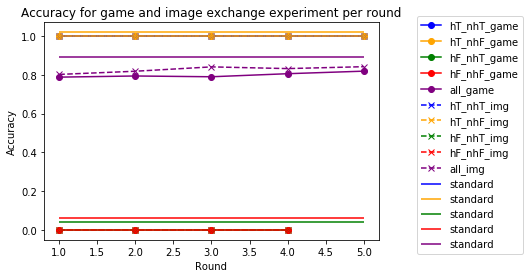

In [43]:
colors = ['blue', 'orange', 'green', 'red', 'purple']
x_range = list(range(1,6))
plot_conds = ['hT_nhT', 'hT_nhF','hF_nhT','hF_nhF', 'all']
# plot_conds = ['all']

# Create the hist_means dictionary
hist_means = {condition:[] for condition in accs_hist}
nohist_means = {condition:[] for condition in accs_hist}
for i in range(5):
    experiment = 'games_'+str(i)
    accs_hist, accs_nohist, lengths = print_accs(experiment, print_res=False)
    for condition in accs_hist:
        hist_means[condition].append(accs_hist[condition].mean())
        nohist_means[condition].append(accs_nohist[condition].mean())
    
# Plot the game lines
for i in range(len(plot_conds)):
    condition = list(plot_conds)[i]
    plt.plot(x_range, hist_means[condition], marker='o', label=condition+"_game", color=colors[i])

plt.title("Accuracy for game exchange experiment per round")
plt.ylabel('Accuracy')
plt.xlabel('Round')
plt.legend()
# plt.show()


# Create dicts with the mean accuracies
hist_means = {condition:[] for condition in accs_hist}
nohist_means = {condition:[] for condition in accs_hist}
for i in range(5):
    experiment = 'imgs_'+str(i)
    accs_hist, accs_nohist, lengths = print_accs(experiment, print_res=False)
    for condition in accs_hist:
        hist_means[condition].append(accs_hist[condition].mean())
        nohist_means[condition].append(accs_nohist[condition].mean())
    
# Plot the images mean accuracies
for i in range(len(plot_conds)):
    condition = list(plot_conds)[i]
    plt.plot(x_range, hist_means[condition], marker='x', label=condition+'_img', color=colors[i], linestyle='--')

# Plot the standard results (i.e. 0 or 1)
for i in range(len(plot_conds)):
    condition = list(plot_conds)[i]
    plt.hlines(accs_hist_orig[condition]+(i*.02), 1, 5, color=colors[i], label='standard')

# Plot the random baseline
# plt.hlines(1/6, 1, 5, color='black', label='random')
# plt.hlines(1/12, 1, 5, color='black')
    
plt.title("Accuracy for game and image exchange experiment per round")
plt.ylabel('Accuracy')
plt.xlabel('Round')
plt.legend()
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()   
    

Plot the results including the errorbar

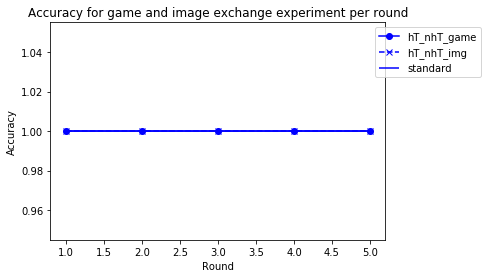

In [45]:
hist_means = {condition:[] for condition in accs_hist}
hist_stds = {condition:[] for condition in accs_hist}

nohist_means = {condition:[] for condition in accs_hist}
colors = ['blue', 'orange', 'green', 'red', 'purple']
x_range = list(range(1,6))
plot_conds = ['hT_nhT', 'hT_nhF','hF_nhT','hF_nhF', 'all']
plot_conds = ['all']
plot_conds = ['h_nh_all']
plot_conds = ['hT_nhT']
# plot_conds = ['hT_nhF']
# plot_conds = ['hT_nhF', 'hT_nhT']

# Create the hist_means dictionary
for i in range(5):
    experiment = 'games_'+str(i)
    accs_hist, accs_nohist, lengths = print_accs(experiment, print_res=False)
    for condition in accs_hist:
        hist_means[condition].append(accs_hist[condition].mean())
        hist_stds[condition].append(accs_hist[condition].std())
    
# Plot the game lines
for i in range(len(plot_conds)):
    condition = list(plot_conds)[i]
    plt.plot(x_range, hist_means[condition], marker='o', label=condition+"_game", color=colors[i])
    plt.fill_between(x_range, np.array(hist_means[condition])-np.array(hist_stds[condition]), np.array(hist_means[condition])+np.array(hist_stds[condition]),
                     color=colors[i], alpha=.2)

plt.title("Accuracy for game exchange experiment per round")
plt.ylabel('Accuracy')
plt.xlabel('Round')
plt.legend()
# plt.show()


# Create dicts with the mean accuracies
hist_means = {condition:[] for condition in accs_hist}
hist_stds = {condition:[] for condition in accs_hist}
for i in range(5):
    experiment = 'imgs_'+str(i)
    accs_hist, accs_nohist, lengths = print_accs(experiment, print_res=False)
    for condition in accs_hist:
        hist_means[condition].append(accs_hist[condition].mean())
        hist_stds[condition].append(accs_hist[condition].std())
    
# Plot the images mean accuracies
for i in range(len(plot_conds)):
    condition = list(plot_conds)[i]
    plt.plot(x_range, hist_means[condition], marker='x', label=condition+'_img', color=colors[i], linestyle='--')
    plt.fill_between(x_range, np.array(hist_means[condition])-np.array(hist_stds[condition]), np.array(hist_means[condition])+np.array(hist_stds[condition]),
                    color=colors[i], alpha=.2)

# Plot the standard results (i.e. 0 or 1)
for i in range(len(plot_conds)):
    condition = list(plot_conds)[i]
    plt.hlines(accs_hist_orig[condition]+(i*.02), 1, 5, color=colors[i], label='standard')

# Plot the random baseline
# plt.hlines(1/6, 1, 5, color='black', label='random')
# plt.hlines(1/12, 1, 5, color='black')
    
plt.title("Accuracy for game and image exchange experiment per round")
plt.ylabel('Accuracy')
plt.xlabel('Round')
plt.legend()
plt.legend(bbox_to_anchor=(1.3, 1.00))
plt.show()   
    

## TODO: run a paired anova over the results per experiment, using results from the dataframe